In [22]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
plt.close("all")


# First, Load all data into a single dataframe
BY_Level = {}
for file in os.listdir("../BY level"):
    if file.endswith(".csv"):
        try:
            BY_Level[int(file.split('.')[0][-1])] = pd.read_csv(f"../BY level/{file}")
        except Exception as e:
            print(f"failed to load file {file}")

temp = []
for file in os.listdir("../Language Arts"):
    if file.endswith(".csv"):
        try:
            df = pd.read_csv(f"../Language Arts/{file}")
            temp.append(df)
        except Exception as e:
            print(f"failed to load file {file}")
Language_Arts = pd.concat(temp)

temp = []
for file in os.listdir("../Math"):
    if file.endswith(".csv"):
        try:
            df = pd.read_csv(f"../Math/{file}")
            temp.append(df)
        except Exception as e:
            print(f"failed to load file {file}") 
Math = pd.concat(temp)



temp = []
for file in os.listdir("../Reading"):
    if file.endswith(".csv"):
        try:
            df = pd.read_csv(f"../Reading/{file}")
            temp.append(df)
        except Exception as e:
            print(f"failed to load file {file}")
Reading = pd.concat(temp)
ALL_Subjects = pd.concat([Language_Arts,Math,Reading])


In [23]:
# Set global variables/constants

INTERVALS = [1988,1993,1998,2003,2008,2013,2020]
LABELS = ['1988-1993','1993-1998','1998-2003','2003-2008','2008-2013','2013-2020']
GRADES = [i for i in range(3,9)]


In [24]:
# Cleaning data. Changing date to just year, taking out 0 scores
ALL_Subjects['takenyear']=pd.DatetimeIndex(ALL_Subjects['takendate']).year
ALL_Subjects = ALL_Subjects[ALL_Subjects['takenyear']<2020]
ALL_Subjects = ALL_Subjects[ALL_Subjects['rit']!=0]
ALL_Subjects['taken_year_bin'] = pd.cut(ALL_Subjects['takenyear'],INTERVALS,right = False, labels=LABELS)

# ALL_SUBJECTS.to_csv('ALL_SUBJECTS.csv', index=False)  

# Parsing it into different subjects
Language_Arts = ALL_Subjects[ALL_Subjects['subject'] == 'L']
Math = ALL_Subjects[ALL_Subjects['subject'] == 'M']
Reading = ALL_Subjects[ALL_Subjects['subject'] == 'R']

#Language_Arts.to_csv('Language_Arts.csv', index=False)  
Math['testlevel'].unique()

array([34, 35, 33, 32, 31, 36, 13, 37, 14, 16, 17, 15, 18, 19],
      dtype=int64)

In [25]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Split data into test and train for data analysis
Language_Arts_train, Language_Arts_test = train_test_split(Language_Arts, test_size=0.25, random_state = 7)
Math_train, Math_test = train_test_split(Math, test_size=0.25, random_state = 7)
Reading_train, Reading_test = train_test_split(Reading, test_size=0.25, random_state = 7)

In [26]:
def create_model01(dataframe):
    X = pd.concat((dataframe[['takenyear']],
                   dataframe[['Grade']],
                   dataframe[['testlevel']],
                    ),
                  axis=1)
    y = pd.DataFrame(dataframe[['rit']])
    X = sm.add_constant(X)
    model01 = sm.OLS(y,X).fit()
    return model01

def clean_test_data(dataframe):
    parameters = pd.concat((dataframe[['takenyear']],
                            dataframe[['Grade']],
                            dataframe[['testlevel']],),
                            axis=1)
    answer = pd.DataFrame(dataframe[['rit']])
    return parameters,answer

In [15]:
# Divide Math data into below and above 30 only
Math_train_advanced = Math_train[Math_train['testlevel'] > 30]
# Test level below 30 only
Math_train_normal = Math_train[Math_train['testlevel'] < 30]
# Divide Math data into below and above 30 only
Math_test_advanced = Math_test[Math_test['testlevel'] > 30]
# Test level below 30 only
Math_test_normal = Math_test[Math_test['testlevel'] < 30]

In [74]:
# Creating model 

#create_model01(Language_Arts_train).summary()
#create_model01(Reading_train).summary()
#create_model01(Math_train_normal).summary() # Test level is below 30
#create_model01(Math_train_advanced).summary()
#create_model01(Math_train).summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    rit   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                 2.714e+04
Date:                Thu, 13 May 2021   Prob (F-statistic):               0.00
Time:                        18:04:02   Log-Likelihood:            -2.0424e+05
No. Observations:               53742   AIC:                         4.085e+05
Df Residuals:                   53738   BIC:                         4.085e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -338.1451     11.106    -30.448      0.000    -359.912    -316.378
takenyear      0.1213      0.006     22.037      0.000       0.110       0.132
Grade         -0.0960      0.065     -1.471      0.141      -0.224       0.032
testlevel      8.8762      0.039    230.238      0.000       8.801       8.952
==============================================================================
Omnibus:                     2986.788   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4570.698
Skew:                           0.480   Prob(JB):                         0.00
Kurtosis:                       4.058   Cond. No.                     4.77e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
import numpy as np
def create_line_graph_forourmodel(dataframe, model,name):
    """This function will create  box plot behind model graph based on mean"""
    plt.rcParams.update({'font.size': 12})
    constant, takenyear, Grade, testlevel = model.params
    constant_std,takenyear_std, Grade_std, testlevel_std = model.bse
    
    plt.figure(figsize=(20, 9))
    # Take the mean to plot it out
    df = dataframe.groupby(dataframe['takenyear'])[['takendate',
                                                    'rit','Grade','testlevel',
                                                   ]].mean().reset_index()

    y = df['rit']
    ty = df['takenyear']
    gr = df['Grade']
    tl = df['testlevel']
    data = []
    mean = []
    median = []
    # https://stackoverflow.com/questions/5938459/combining-plt-plotx-y-with-plt-boxplot
    for label in range(1988,2020):
        data += [dataframe[dataframe['takenyear']==label]['rit']]
    plt.plot(ty, constant + ty*takenyear + gr * Grade + tl * testlevel ,color = 'red',
             zorder=10)
    plt.plot(ty, constant + ty*(takenyear+takenyear_std) + gr * (Grade+Grade_std) \
             + tl * (testlevel+testlevel_std)  \
             + constant_std, color = 'red',
             zorder=10)
    plt.plot(ty, constant + ty*(takenyear-takenyear_std) + gr * (Grade-Grade_std) \
             + tl * (testlevel-testlevel_std) \
             - constant_std,color = 'red',
             zorder=10)
    locs,labels = plt.xticks()
    pos = sorted(df['takenyear'])
    pos = np.array(pos)
    plt.boxplot(data,positions = pos,
                showfliers=False, 
                showmeans=True,
                notch = True,
                patch_artist = True,
                boxprops = dict(facecolor='c'),
                medianprops = dict(color='red'),
                zorder=5)
    plt.suptitle(f'Boxplot and Linear regression applied on MEAN for {name}')
    plt.xlabel('Year')
    plt.ylabel('RIT')
    plt.savefig(f'../Boxplots/BP_and_LM/{name}')
    plt.show()
    plt.close()

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


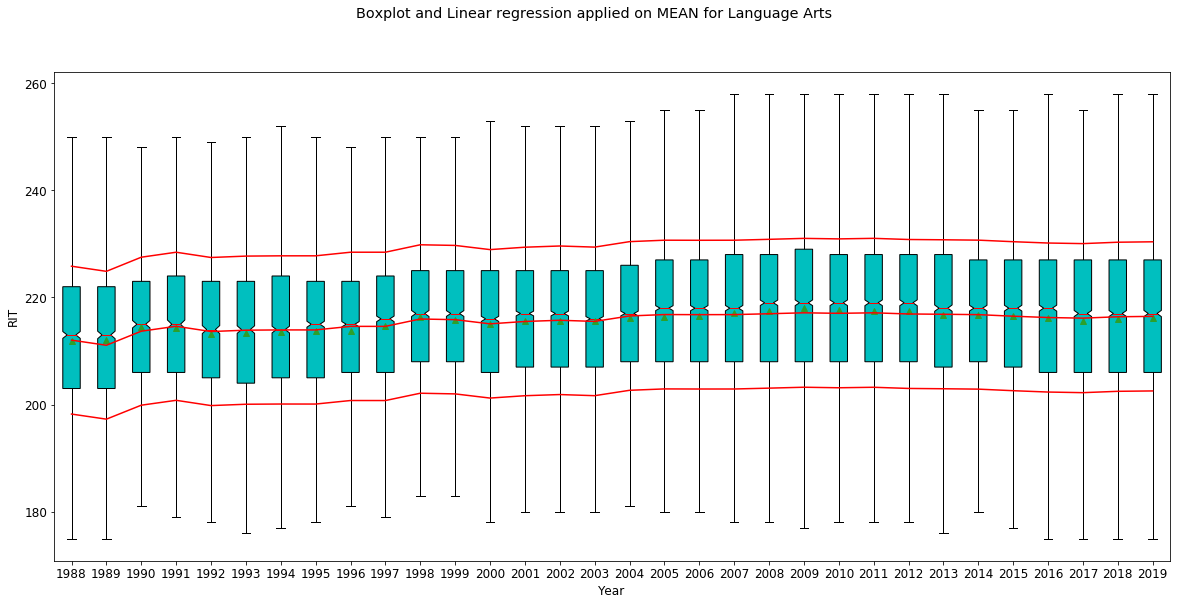

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


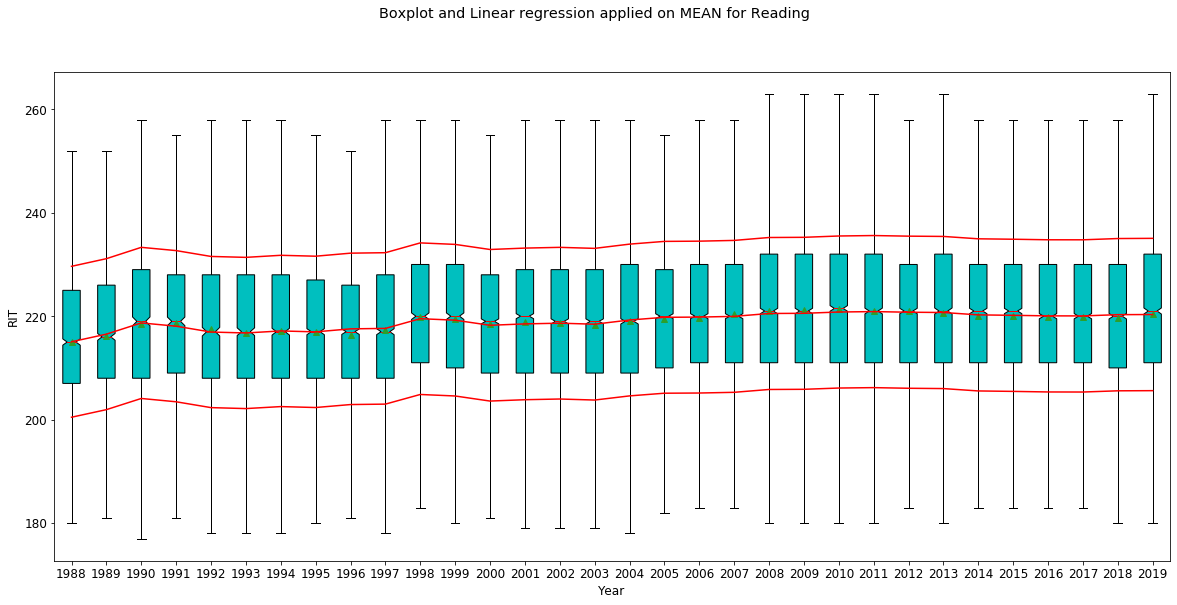

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


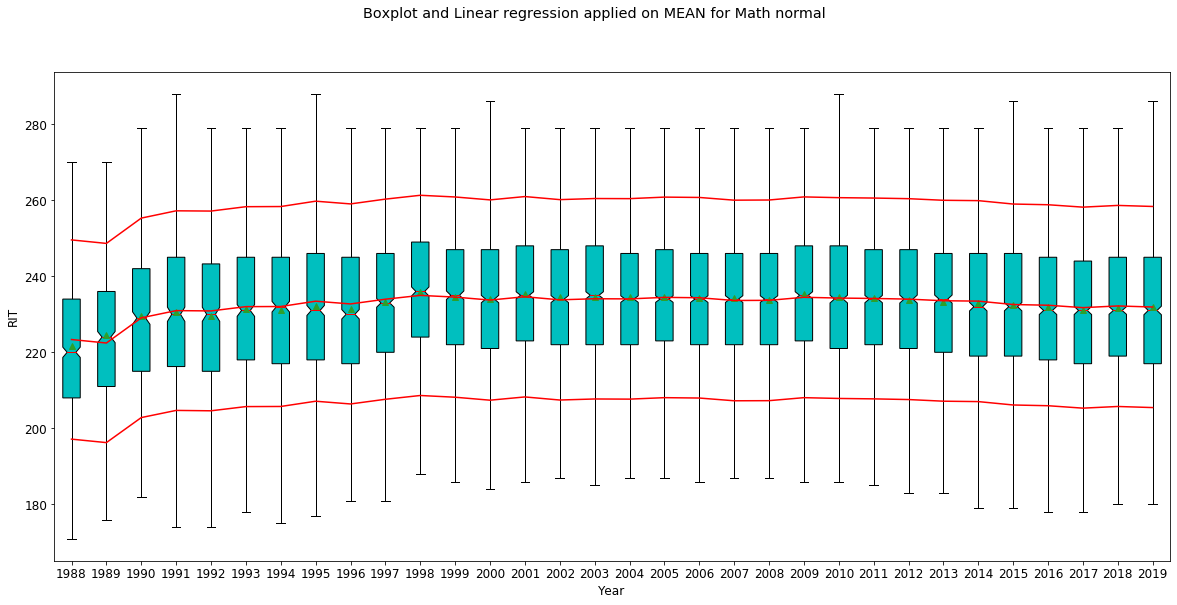

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


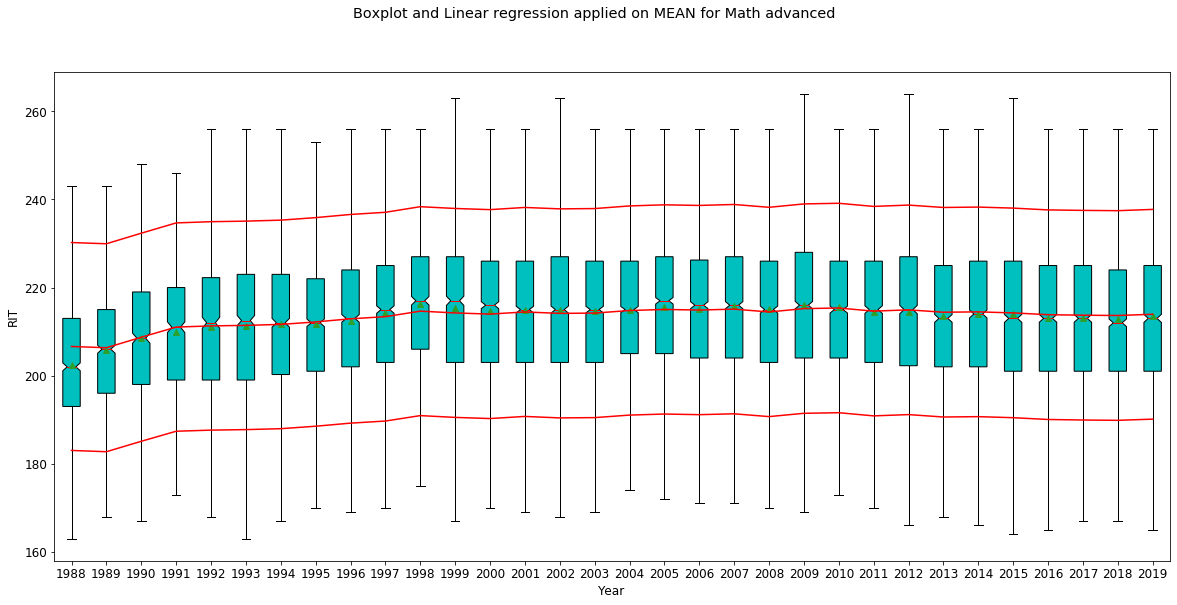

In [18]:
create_line_graph_forourmodel(Language_Arts_train, create_model01(Language_Arts_train),"Language Arts")
create_line_graph_forourmodel(Reading_train, create_model01(Reading_train),"Reading")
create_line_graph_forourmodel(Math_train_normal, create_model01(Math_train_normal),"Math normal")
create_line_graph_forourmodel(Math_train_advanced, create_model01(Math_train_advanced),"Math advanced")


C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


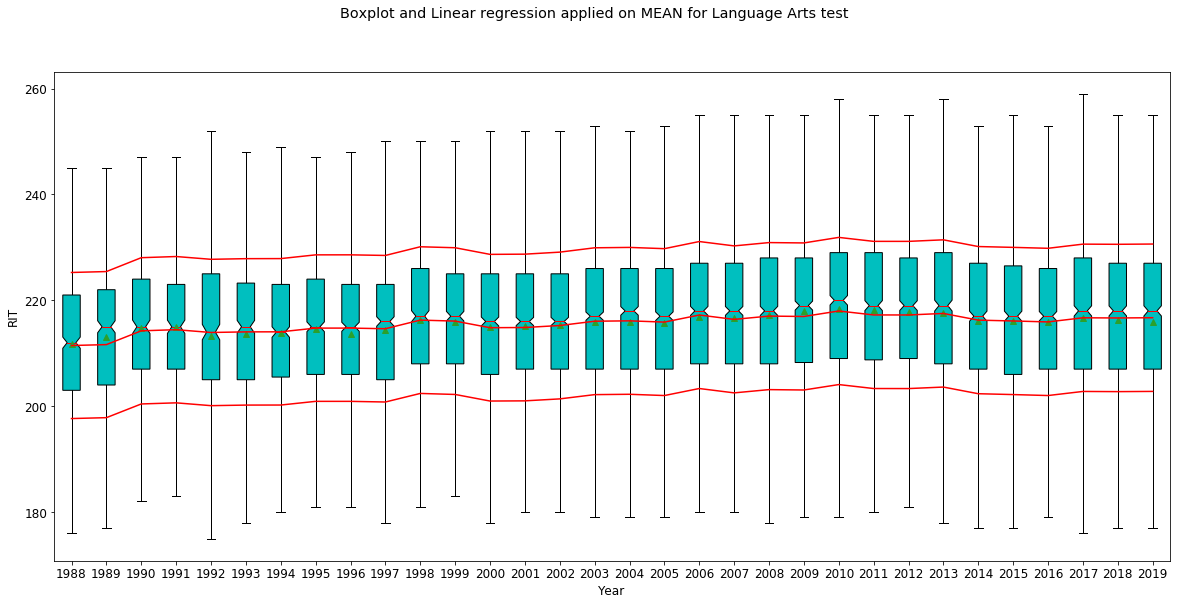

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


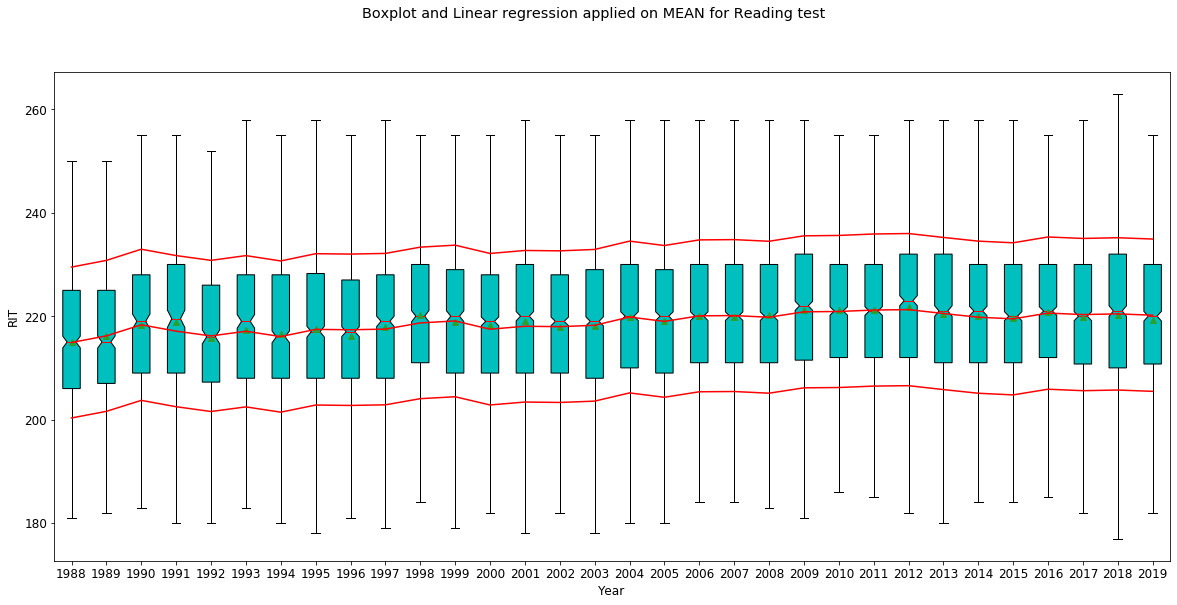

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


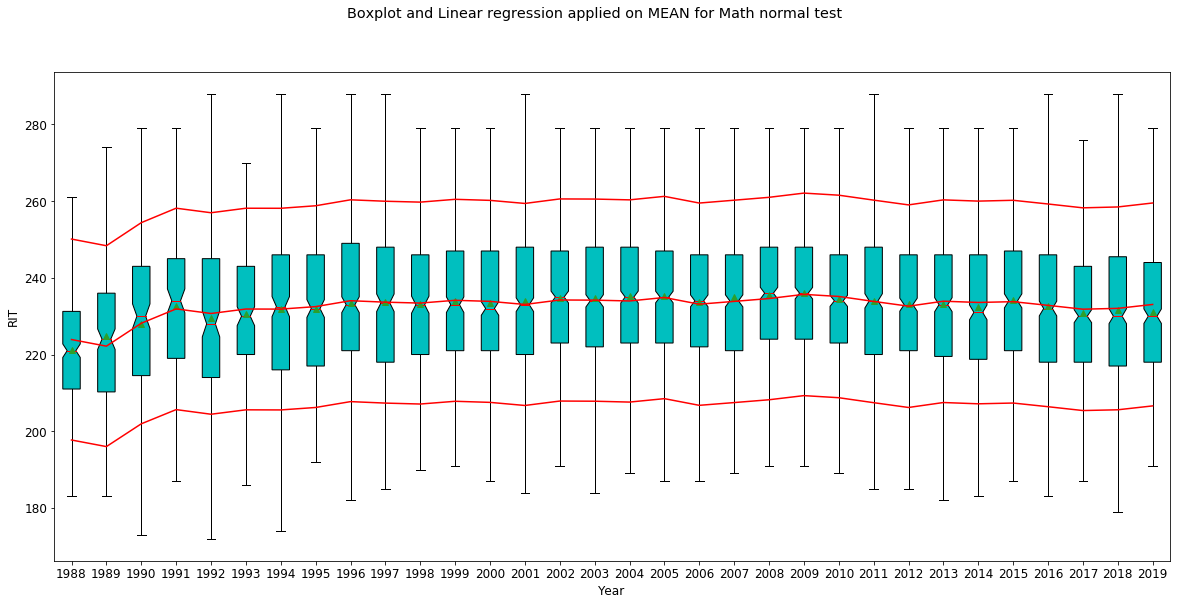

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


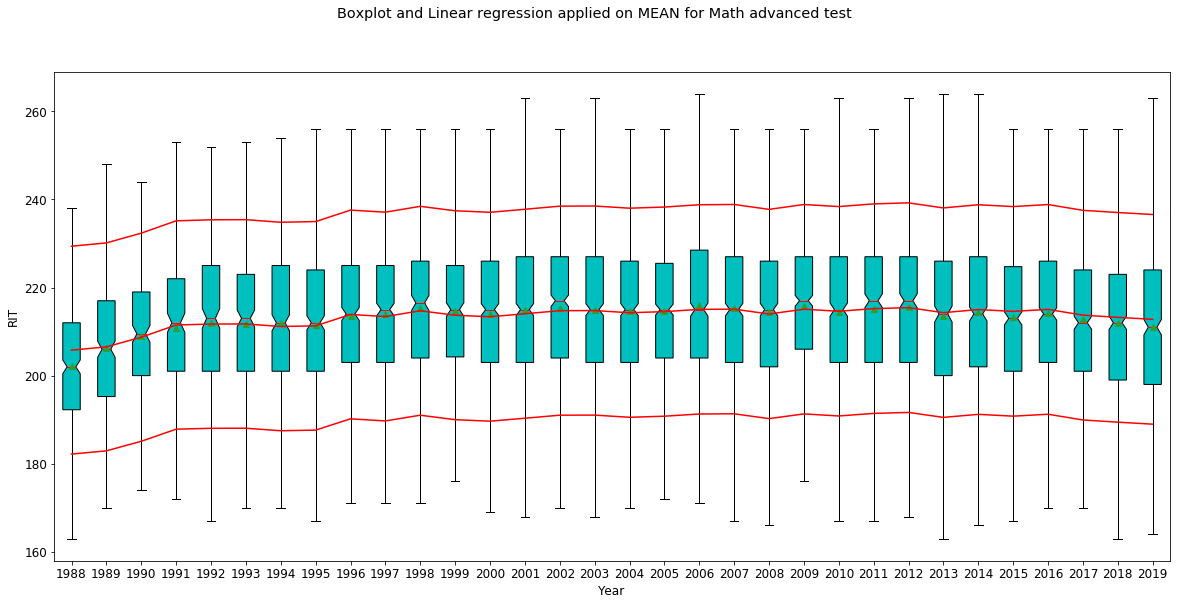

In [19]:
create_line_graph_forourmodel(Language_Arts_test, create_model01(Language_Arts_train),"Language Arts test")
create_line_graph_forourmodel(Reading_test, create_model01(Reading_train),"Reading test")
create_line_graph_forourmodel(Math_test_normal, create_model01(Math_train_normal),"Math normal test")
create_line_graph_forourmodel(Math_test_advanced, create_model01(Math_train_advanced),"Math advanced test")

In [43]:
def create_boxplot(dataframe,name,analyze,savefigure=True):
    """ This function creates boxplot in intervals of years """
    try:
        df = dataframe[['testlevel','Grade','taken_year_bin','rit']]
    except e:
        print(e)
        return
    if analyze == 'Grade':
        for i in GRADES:
            temp = df[df['Grade']==i]
            data = []
            mean = []
            median = []
            for label in LABELS:
                data += [temp[temp['taken_year_bin']==label]['rit']]
                mean += [round(temp[temp['taken_year_bin']==label]['rit'].mean())]
                median += [round(temp[temp['taken_year_bin']==label]['rit'].median())]
            fig, ax = plt.subplots()
            bp = ax.boxplot(data,
                            showmeans=True,
                            showfliers = False,
                            notch = True,
                            patch_artist = True,
                            boxprops = dict(facecolor='lightblue'),
                            medianprops = dict(color='red'),
                           )
            plt.xticks(list(range(1,len(LABELS)+1)), LABELS  )
            plt.grid(b=True)
            fig.set_size_inches(10,6)
            fig.suptitle(f'Boxplot of {name} Grade {i}')
            k=i
            for k, line in enumerate(bp['medians']):
                x, y = line.get_xydata()[1]
                text = f' μ={mean[k]}\n σ={median[k]}'
                ax.annotate(text, xy=(x-0.02, y+20))
            plt.xlabel('Year')
            plt.ylabel('RIT')
            plt.savefig(f'../Boxplots/By_Grade/{name}/BP_testlevel{i}')
            plt.show()
            plt.close()
        return
    elif analyze == 'testlevel':
        TESTLEVELS = df['testlevel'].unique()
        for i in TESTLEVELS:
            temp = df[df['testlevel']==i]
            data = []
            mean = []
            median = []
            for label in LABELS:
                data += [temp[temp['taken_year_bin']==label]['rit']]
                mean += [round(temp[temp['taken_year_bin']==label]['rit'].mean())]
                median += [round(temp[temp['taken_year_bin']==label]['rit'].median())]
            fig, ax = plt.subplots()
            bp = ax.boxplot(data,
                            showmeans=True,
                            showfliers = False,
                            notch = True,
                            patch_artist = True,
                            boxprops = dict(facecolor='lightblue'),
                            medianprops = dict(color='red'),
                           )
            plt.xticks(list(range(1,len(LABELS)+1)), LABELS  )
            plt.grid(b=True)
            fig.set_size_inches(10,6)
            fig.suptitle(f'Boxplot of {name} testlevel {i}')
            k=i
            for k, line in enumerate(bp['medians']):
                x, y = line.get_xydata()[1]
                text = f' μ={mean[k]}\n σ={median[k]}'
                ax.annotate(text, xy=(x-0.02, y+10))
            plt.xlabel('Year')
            plt.ylabel('RIT')
            plt.savefig(f'../Boxplots/By_testlevel/{name}/BP_testlevel{i}')
            plt.show()
            plt.close()
    else:
        print("We do not have that classification")
    return

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


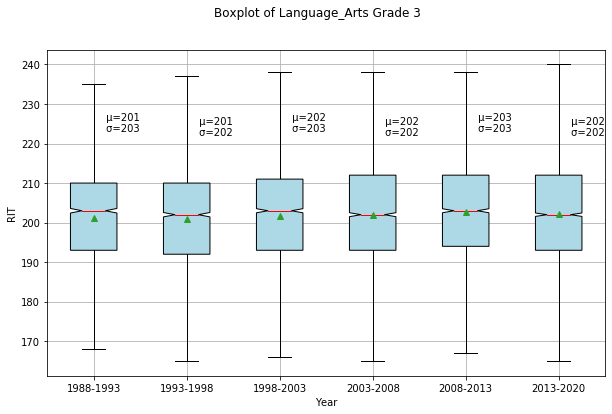

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


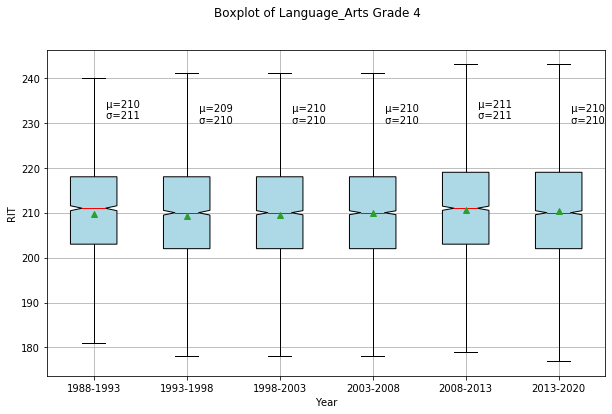

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


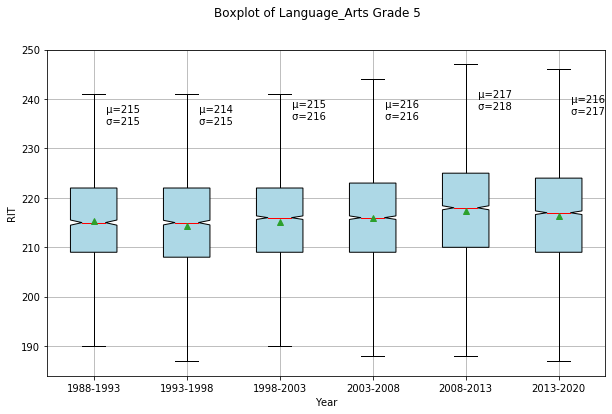

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


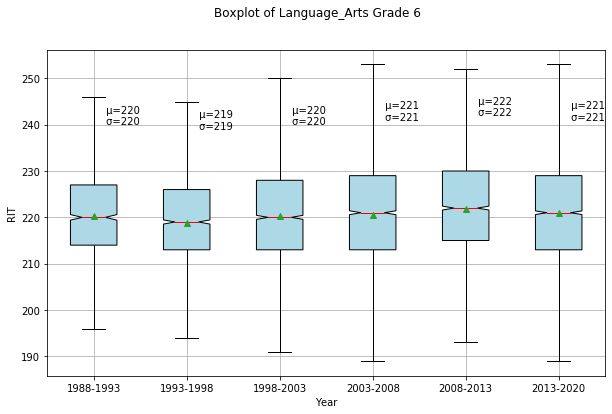

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


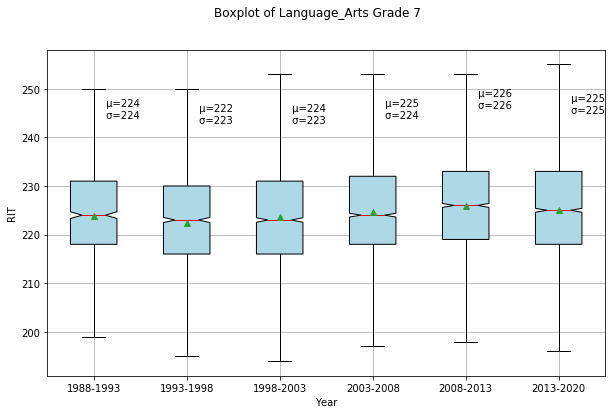

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


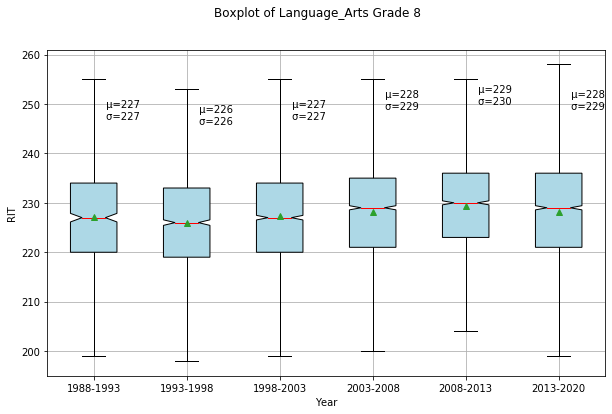

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


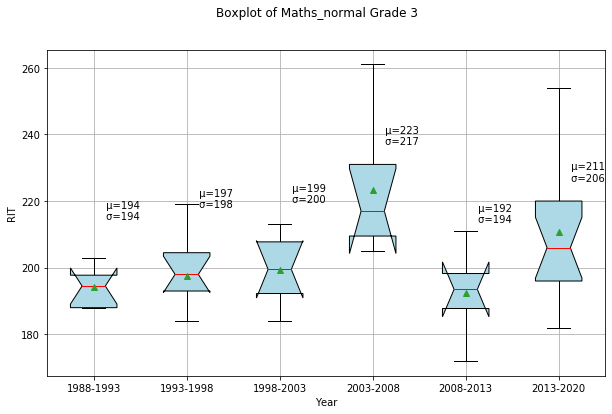

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


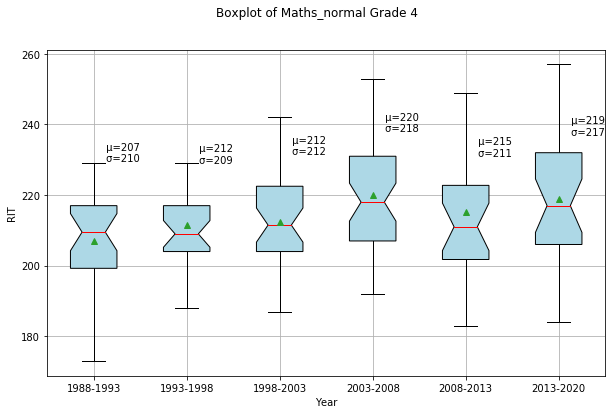

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


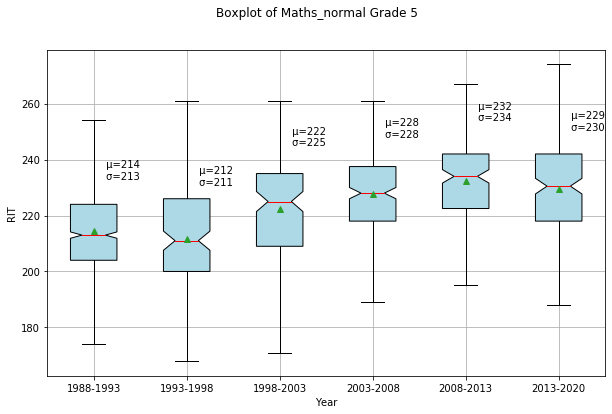

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


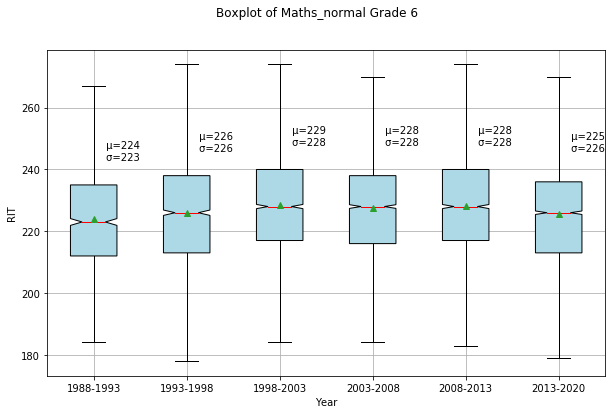

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


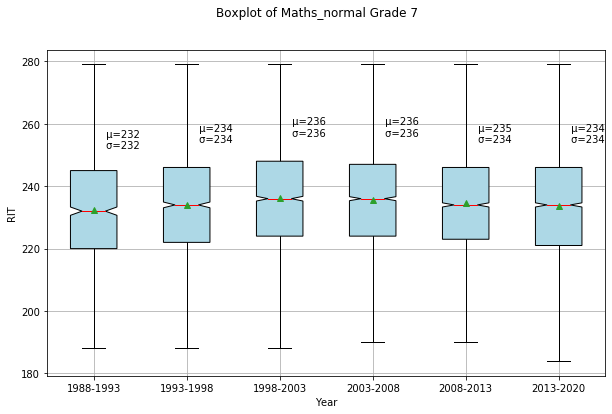

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


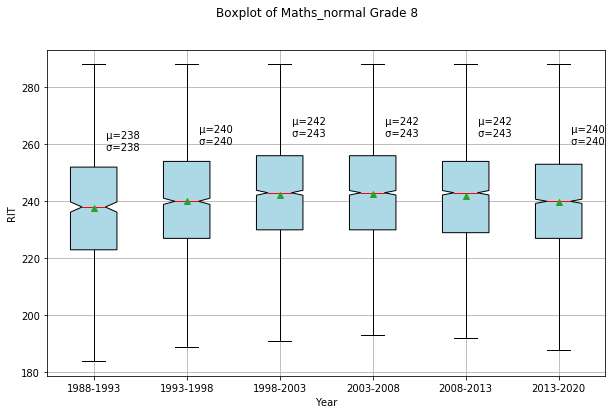

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


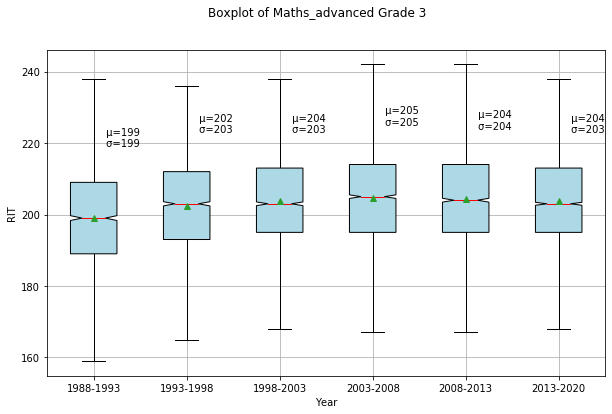

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


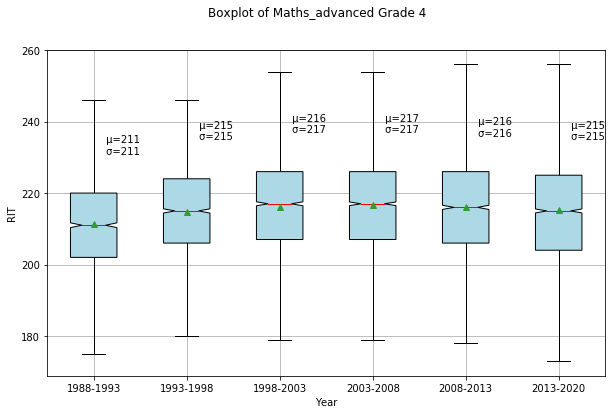

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


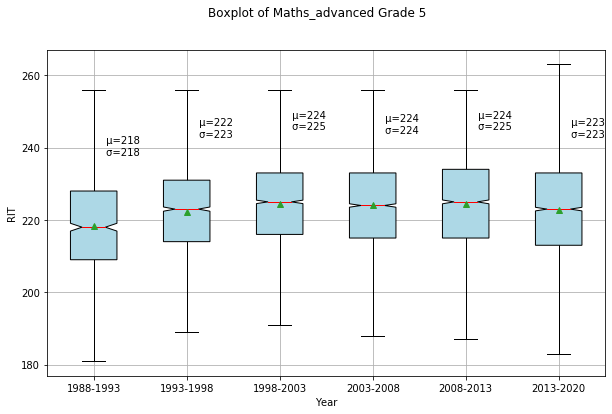

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


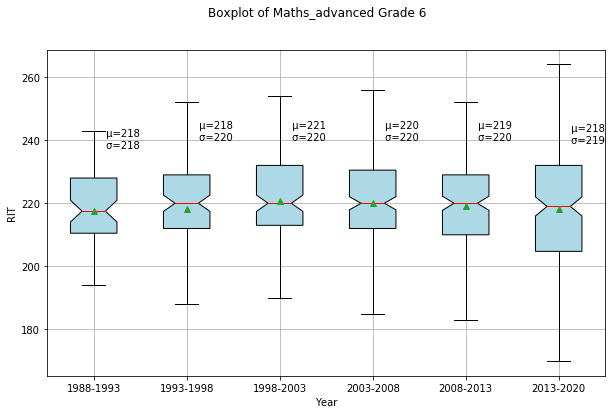

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


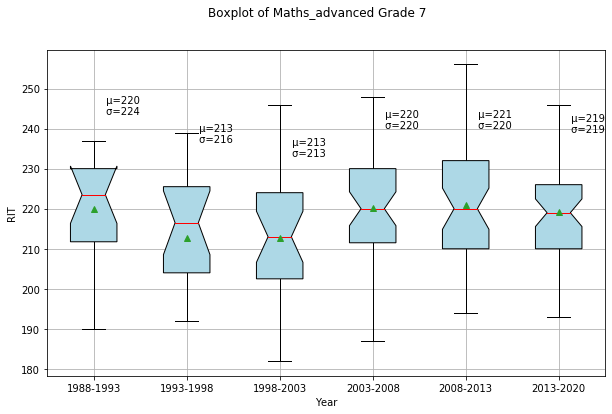

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


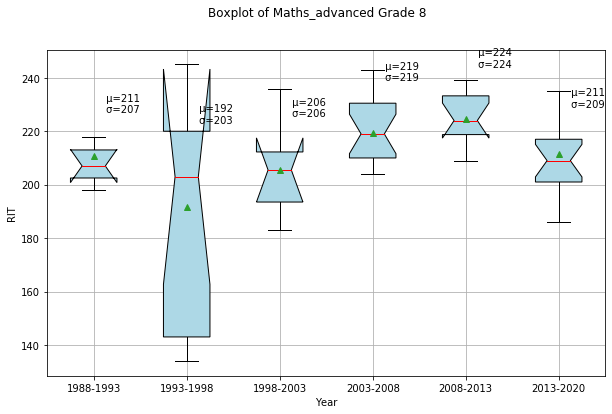

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


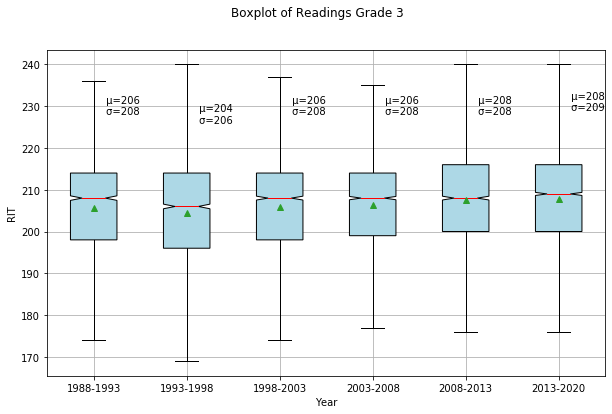

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


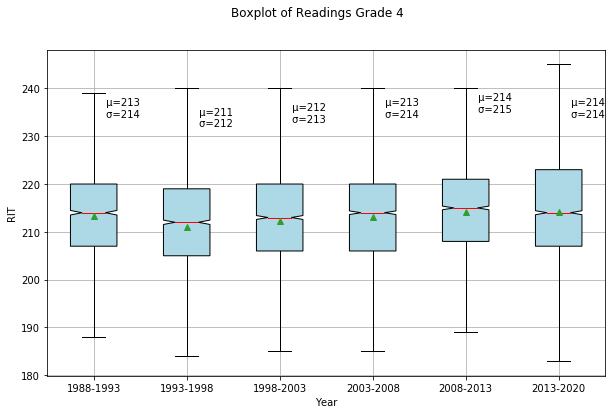

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


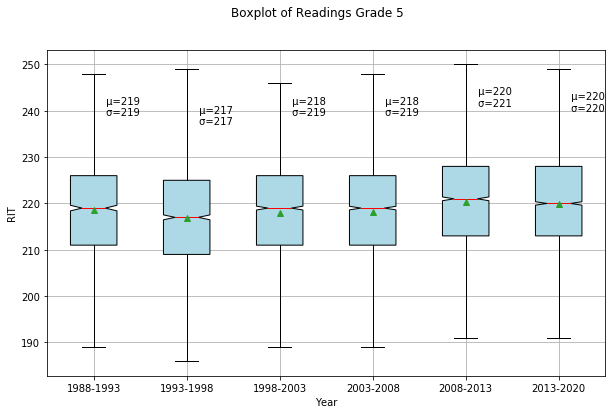

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


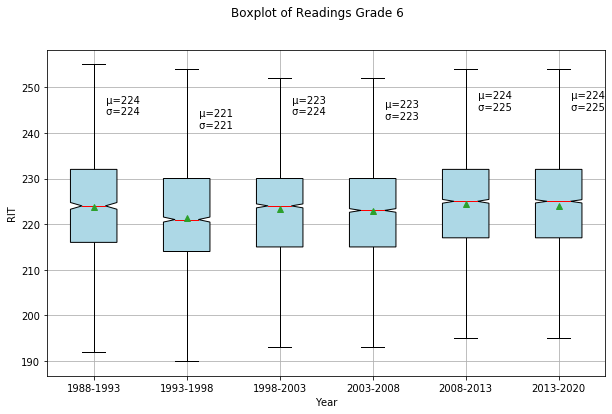

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


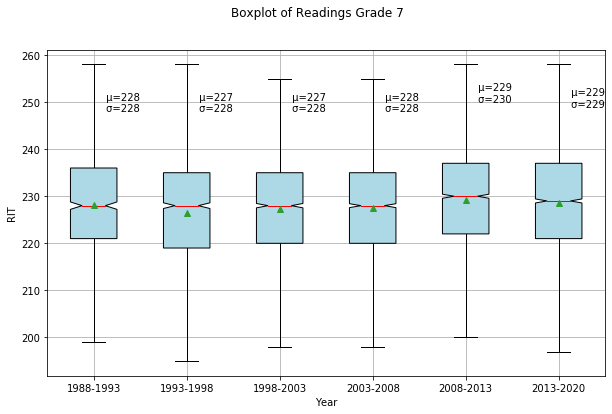

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


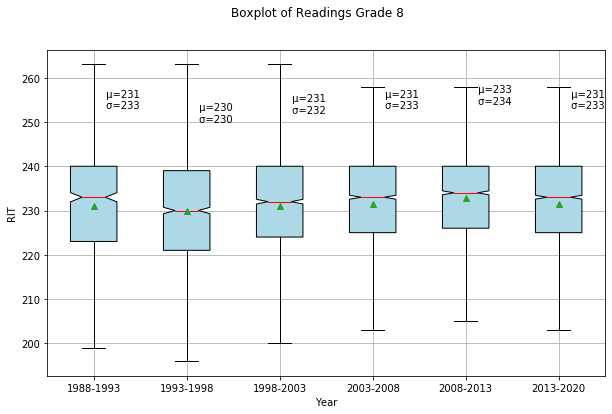

In [44]:
create_boxplot(Language_Arts_train, 'Language_Arts',analyze='Grade',savefigure = True)
create_boxplot(Math_train_normal, 'Maths_normal',analyze='Grade', savefigure = True)
create_boxplot(Math_train_advanced, 'Maths_advanced',analyze='Grade', savefigure = True)
create_boxplot(Reading_train, 'Readings',analyze='Grade',savefigure = True)

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


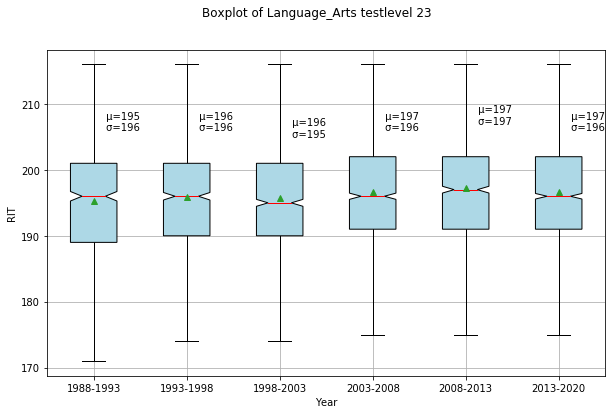

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


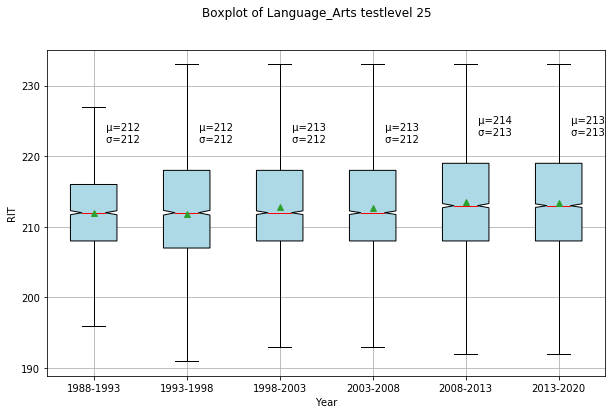

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


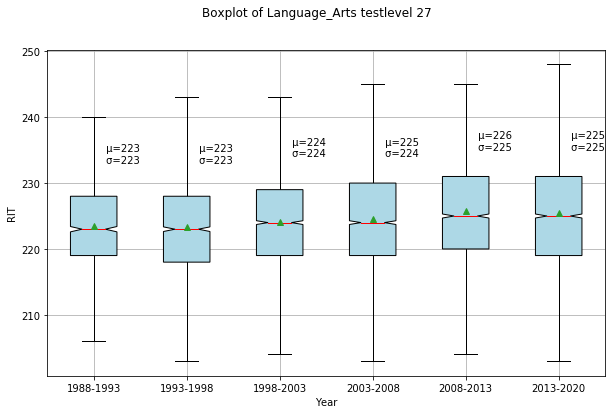

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


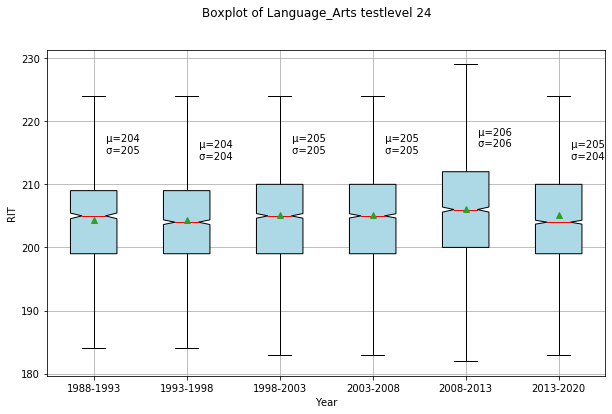

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


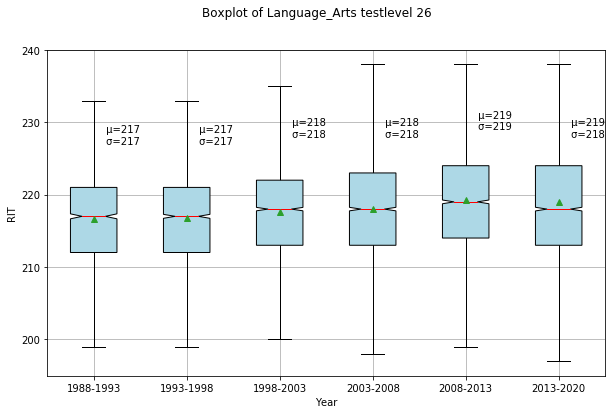

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


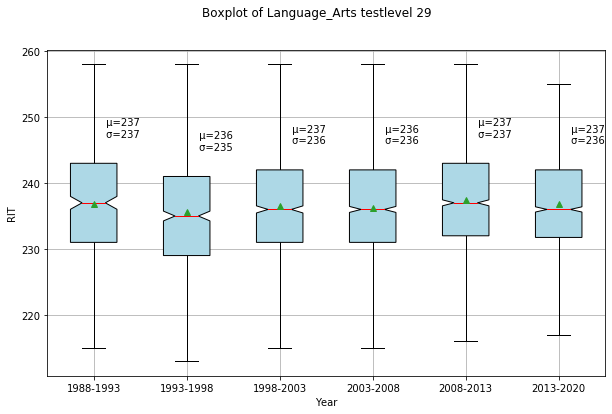

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


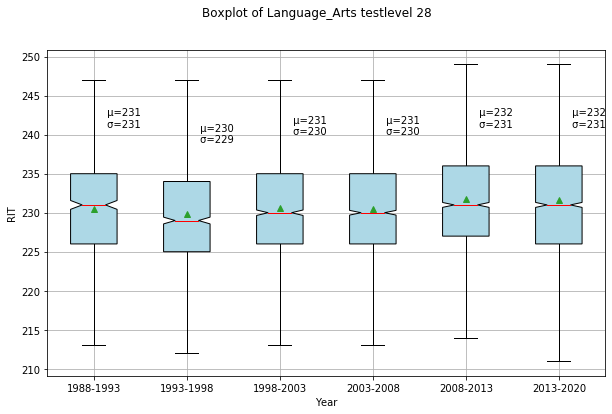

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


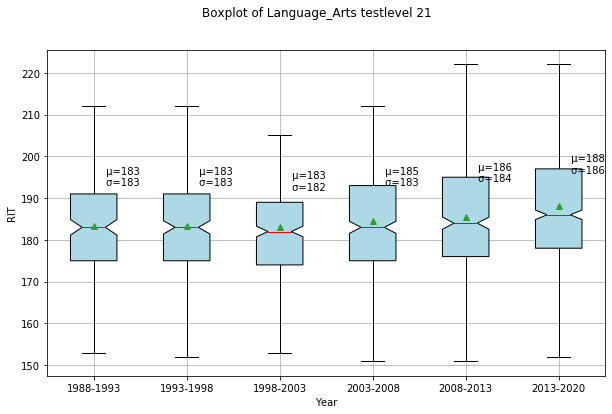

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


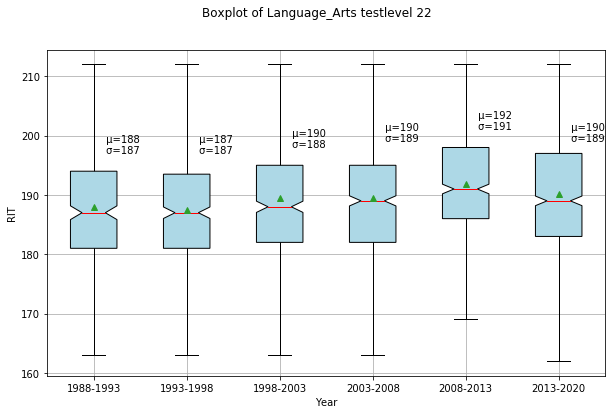

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


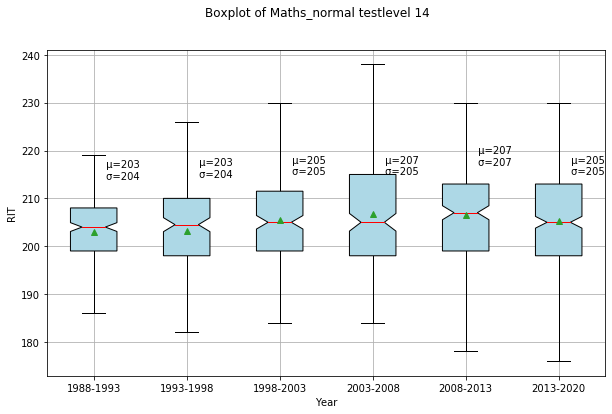

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


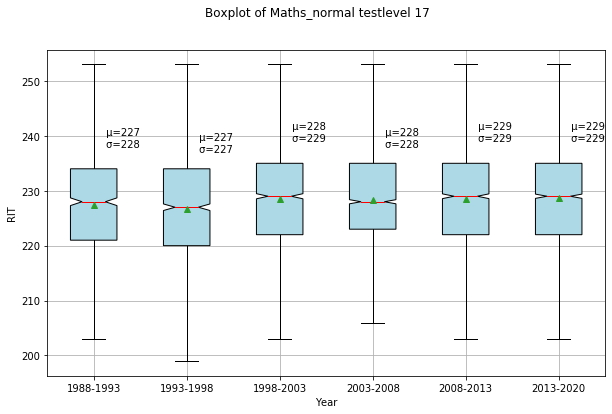

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


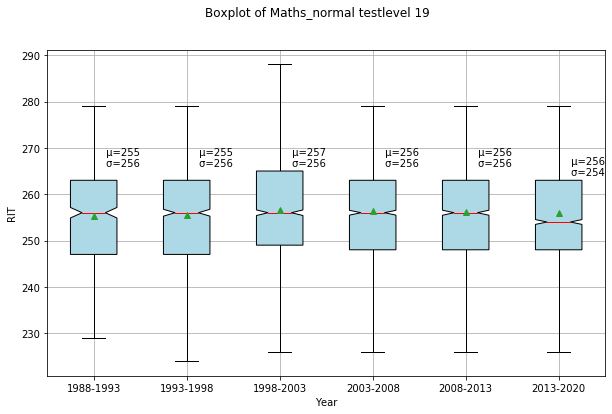

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


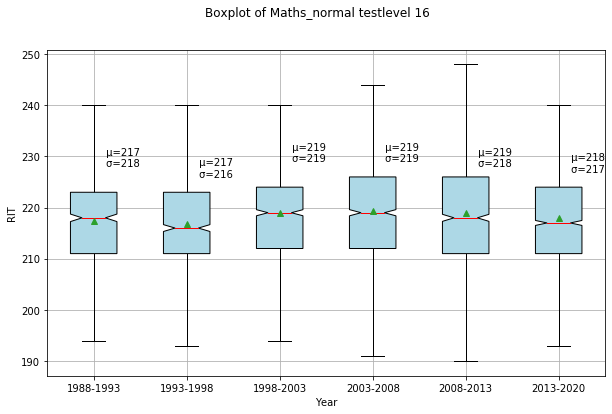

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


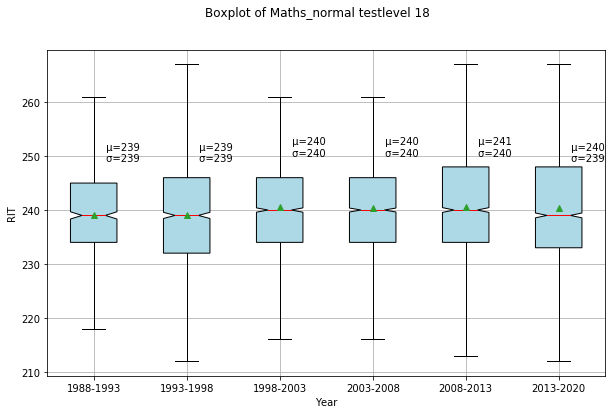

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


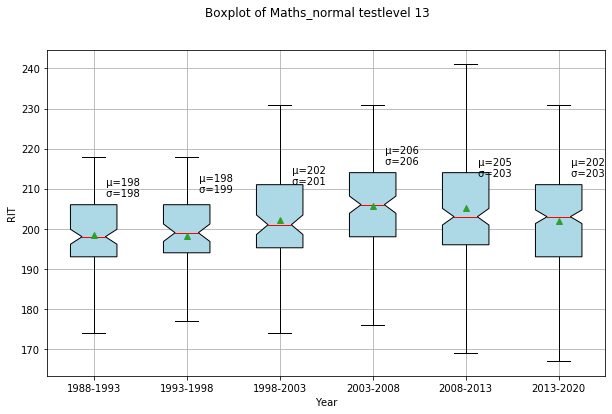

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


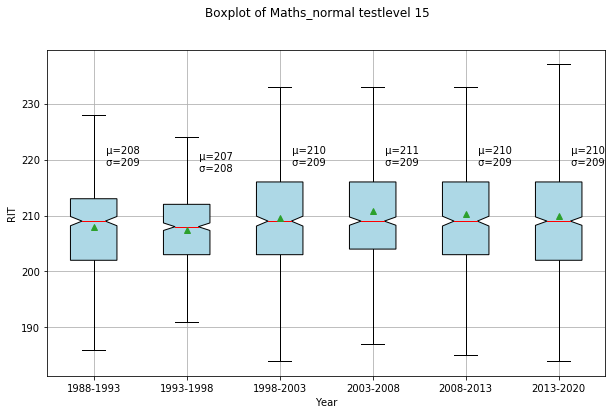

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


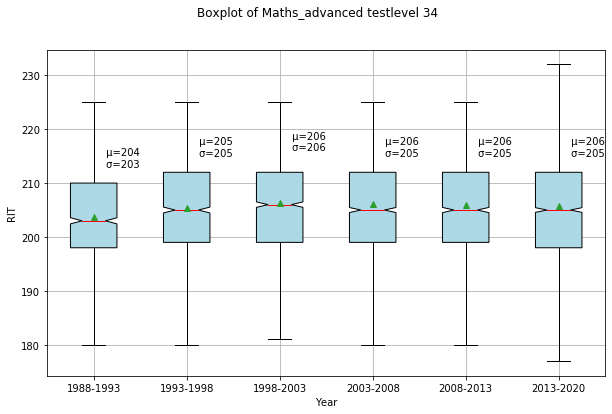

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


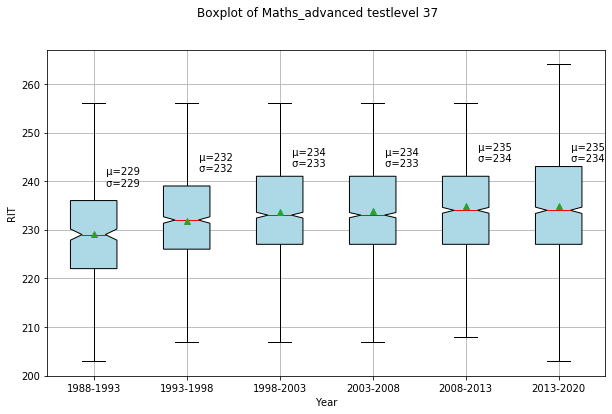

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


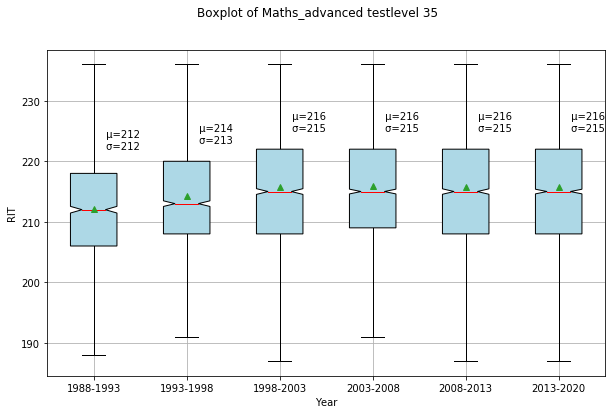

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


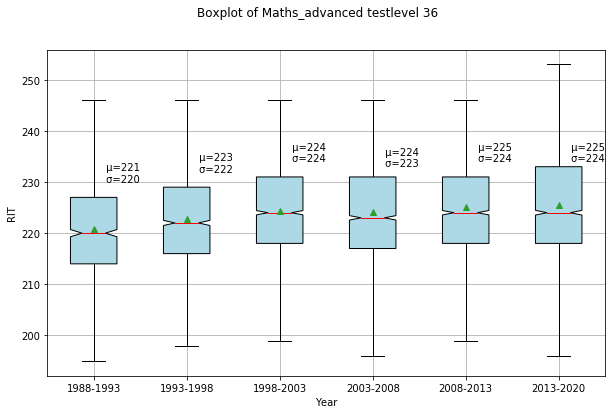

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


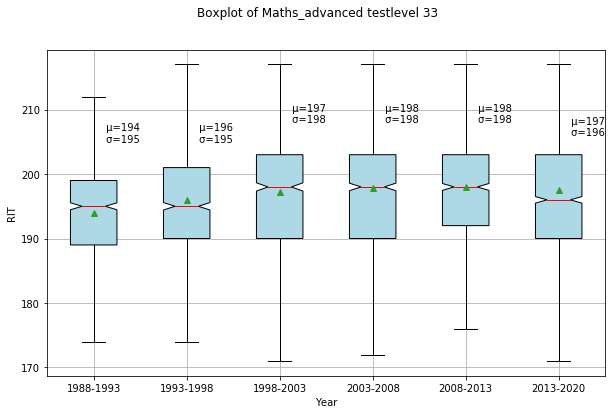

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


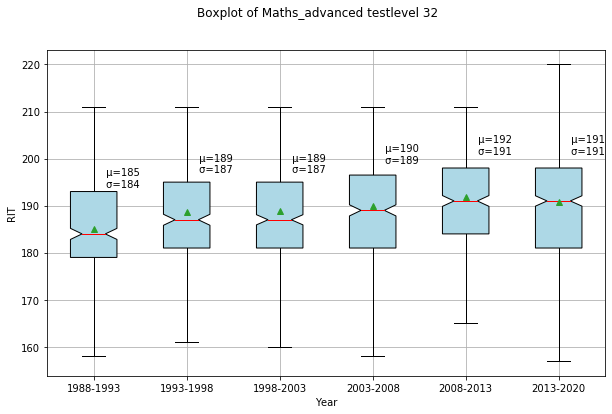

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


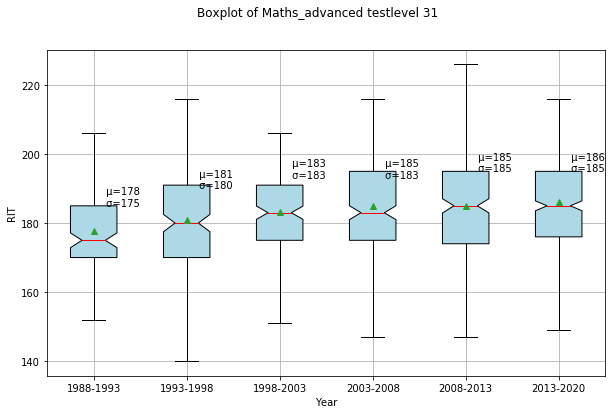

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


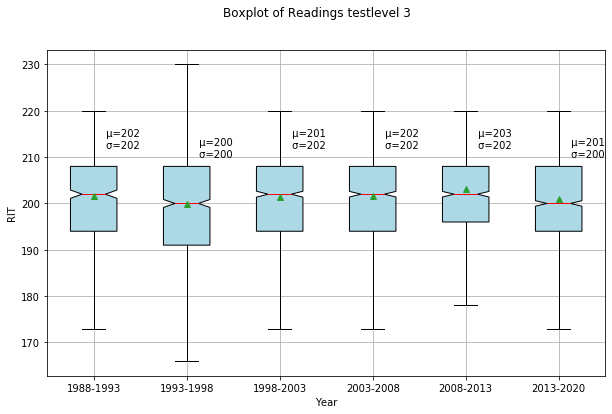

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


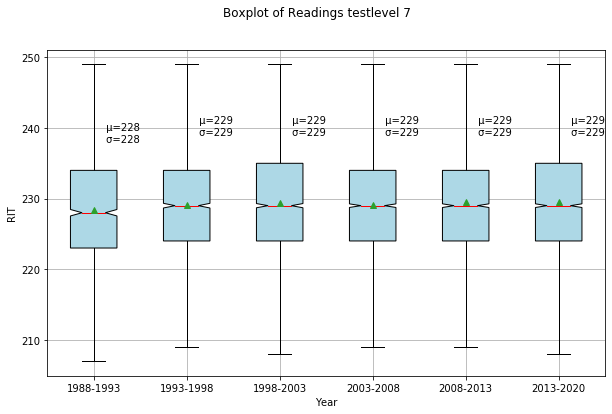

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


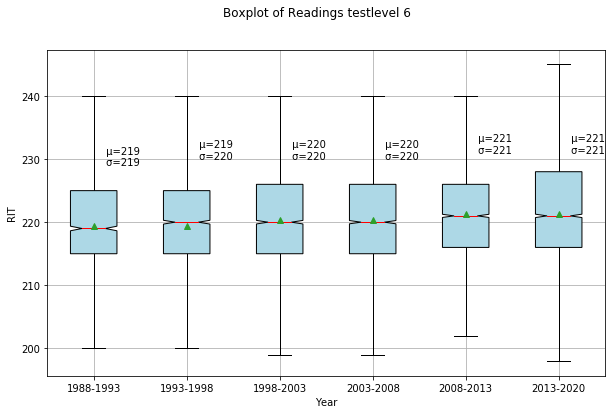

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


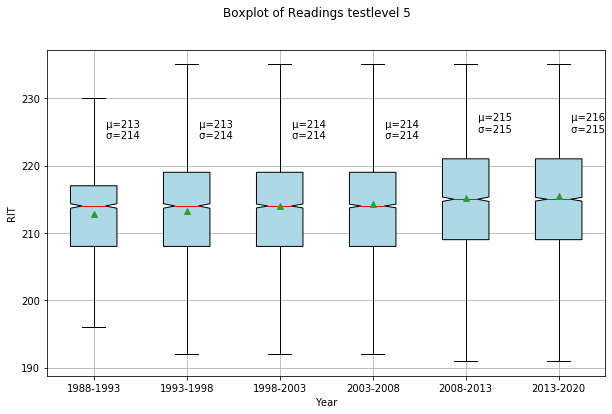

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


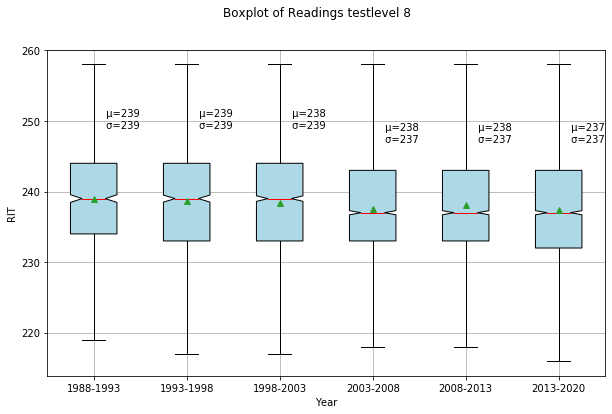

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


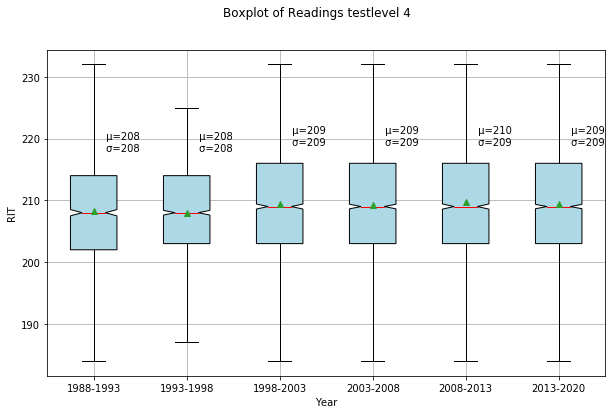

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


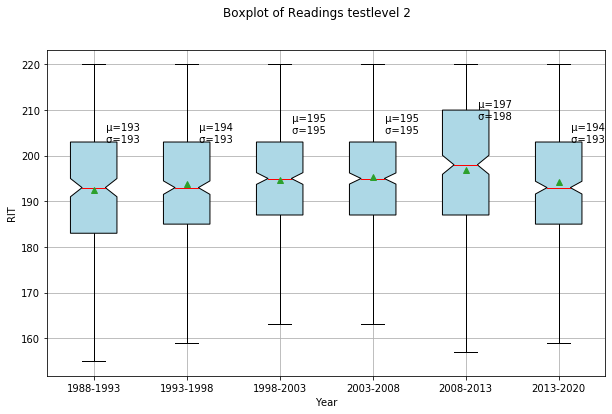

C:\Users\User-Dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


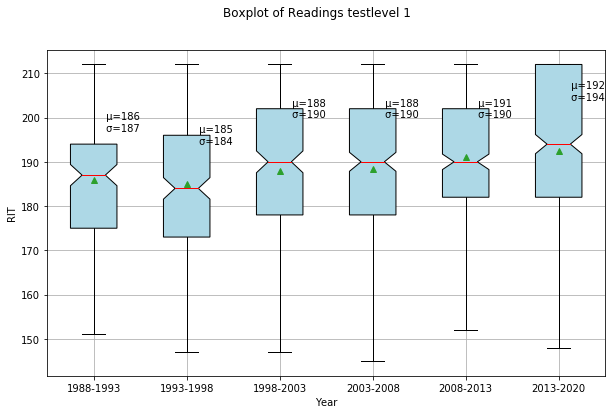

In [45]:
create_boxplot(Language_Arts_train, 'Language_Arts',analyze='testlevel')
create_boxplot(Math_train_normal, 'Maths_normal',analyze='testlevel')
create_boxplot(Math_train_advanced, 'Maths_advanced',analyze='testlevel')
create_boxplot(Reading_train, 'Readings',analyze='testlevel')

In [26]:
# This code block is simply to analyze how many students are in each grade

print("Math Kids")
for i in GRADES:
    df = Math_train_advanced[Math_train_advanced['Grade']==i]
    print(f"Grade {i} has {len(df)} rows")
print("Math Normal")
for i in GRADES:
    df = Math_train_normal[Math_train_normal['Grade']==i]
    print(f"Grade {i} has {len(df)} rows")
print("Language Arts")
for i in GRADES:
    df = Language_Arts_train[Language_Arts_train['Grade']==i]
    print(f"Grade {i} has {len(df)} rows")
print("Readings")
for i in GRADES:
    df = Reading_train[Reading_train['Grade']==i]
    print(f"Grade {i} has {len(df)} rows")

Math Advanced
Grade 3 has 19039 rows
Grade 4 has 16831 rows
Grade 5 has 16721 rows
Grade 6 has 874 rows
Grade 7 has 207 rows
Grade 8 has 70 rows
Math Normal
Grade 3 has 55 rows
Grade 4 has 195 rows
Grade 5 has 1610 rows
Grade 6 has 16326 rows
Grade 7 has 14564 rows
Grade 8 has 12685 rows
Language Arts
Grade 3 has 19064 rows
Grade 4 has 17012 rows
Grade 5 has 18396 rows
Grade 6 has 17100 rows
Grade 7 has 14792 rows
Grade 8 has 12776 rows
Readings
Grade 3 has 19087 rows
Grade 4 has 17029 rows
Grade 5 has 18335 rows
Grade 6 has 17185 rows
Grade 7 has 14854 rows
Grade 8 has 12687 rows


In [25]:
print("Math Advanced")
for i in sorted(list(Math_train_advanced['testlevel'].unique())):
    df = Math_train_advanced[Math_train_advanced['testlevel']==i]
    print(f"testlevel {i} has {len(df)} rows")
print("Math Normal")
for i in sorted(list(Math_train_normal['testlevel'].unique())):
    df = Math_train_normal[Math_train_normal['testlevel']==i]
    print(f"testlevel {i} has {len(df)} rows")
print("Language Arts")
for i in sorted(list(Language_Arts_train['testlevel'].unique())):
    df = Language_Arts_train[Language_Arts_train['testlevel']==i]
    print(f"testlevel {i} has {len(df)} rows")
print("Readings")
for i in sorted(list(Reading_train['testlevel'].unique())):
    df = Reading_train[Reading_train['testlevel']==i]
    print(f"testlevel {i} has {len(df)} rows")

Math Advanced
testlevel 31 has 1398 rows
testlevel 32 has 2491 rows
testlevel 33 has 6608 rows
testlevel 34 has 10418 rows
testlevel 35 has 13272 rows
testlevel 36 has 12382 rows
testlevel 37 has 7173 rows
Math Normal
testlevel 13 has 894 rows
testlevel 14 has 1394 rows
testlevel 15 has 3445 rows
testlevel 16 has 6684 rows
testlevel 17 has 11564 rows
testlevel 18 has 12216 rows
testlevel 19 has 9308 rows
Language Arts
testlevel 21 has 2265 rows
testlevel 22 has 3017 rows
testlevel 23 has 6794 rows
testlevel 24 has 13267 rows
testlevel 25 has 19980 rows
testlevel 26 has 20375 rows
testlevel 27 has 17047 rows
testlevel 28 has 9915 rows
testlevel 29 has 6552 rows
Readings
testlevel 1 has 1710 rows
testlevel 2 has 2123 rows
testlevel 3 has 6447 rows
testlevel 4 has 14698 rows
testlevel 5 has 20210 rows
testlevel 6 has 21926 rows
testlevel 7 has 18927 rows
testlevel 8 has 13207 rows


In [69]:
lang_art_mod = create_model01(Language_Arts_train)
X_test,y_test = clean_test_data(Language_Arts_test)
X_test = sm.add_constant(X_test)
prediction = pd.DataFrame(lang_art_mod.predict(X_test))

correct = 0
wrong = 0
for pred,ans in zip(prediction[0], y_test['rit']):
    print(pred,ans)


230.09802475413346 223
212.53378705850332 223
185.600666761299 174
205.43452396376415 221
222.69935351464218 218
225.57868786959708 243
203.20747128095047 201
210.5611079093768 213
224.37509230606025 219
230.72110594791255 241
237.61349790707325 238
224.7779360186016 232
209.81875701510558 207
217.30502968968318 218
218.72886273445778 223
232.09990438162214 235
237.30072341666187 232
198.25855799255427 197
198.0066522459108 199
197.26430135163957 205
198.08088733533788 187
238.0430743109331 244
210.664543477166 227
223.87128081277322 230
192.6573630320168 191
211.80727029693497 208
199.69822517003172 199
210.63534299880388 208
237.7911685642896 234
203.8013519963675 219
217.86970992673807 224
232.09990438162214 229
205.774031145494 208
205.37365521999627 197
216.97888885361257 223
218.46359064215503 219
224.86553745368798 226
192.09268279496192 202
205.78986527819688 219
232.0415034248979 230
192.83503368923314 188
211.48112946086437 196
224.21325578154676 228
218.46359064215503 219
21

225.2659133791857 234
217.52773495796458 221
210.96148383487449 230
223.88711494547616 232
185.74913694015322 201
216.43004274926062 230
210.3384026410954 220
218.96740213544203 210
212.5045865801412 213
211.62959963971863 230
223.54513997670261 216
218.35768728732216 216
218.15081615174367 221
217.6178041800946 215
211.73303520750784 202
197.93241715648367 199
211.73303520750784 216
198.25855799255427 190
211.8364707752971 218
204.52786875793578 219
231.92223372440577 224
211.59793137431285 208
212.2234803551356 204
186.2687825661431 166
223.61937506612975 225
224.92640619745586 227
231.80296402391366 235
224.93977254311505 231
219.11587231429624 227
211.52369628488572 216
212.02997556521632 213
217.6762051368188 222
191.7665419588913 168
223.4417044089134 230
218.64126129937142 202
204.3209976223573 202
203.72711690694035 189
225.0140076325422 232
224.24245625990883 232
218.07658106231654 217
237.19728784887263 243
223.0254943507128 228
218.77389734552276 225
190.87572088576587 173
2

224.83633697532585 225
218.47695698781428 231
185.74913694015322 188
236.78107779067204 241
203.97902265358383 193
217.58613591468878 228
185.15525622473626 182
232.09990438162214 240
211.13915449209088 225
211.89733951906499 203
211.10995401372875 215
231.95143420276793 241
191.9892472271727 183
212.08837652194057 204
232.09990438162214 220
205.50875905319128 204
185.98520855409382 184
198.155122424765 208
219.19010740372337 230
218.64126129937142 238
226.15673445231118 235
198.85243870797123 194
225.08824272196932 211
218.5670262099443 210
212.40115101235193 203
211.52616407192937 210
218.8931670460149 233
211.85230490799998 212
199.22361415510684 202
196.96736099393104 185
218.41855603109002 218
230.18562618921985 228
185.15525622473626 183
210.36760311945753 210
212.13341113300558 209
218.8030978238849 216
204.24676253293018 204
212.25268083349772 206
185.45219658244474 188
216.71114897426622 213
210.91644922380948 204
236.277266297385 252
211.77806981857285 206
191.09842615404722 

237.89460413207888 241
216.38500813819562 210
197.93241715648367 187
205.1667840844178 215
204.42443319014657 201
211.30345880364803 202
210.8872487454474 230
199.12017858731764 199
218.01818010559234 231
210.78381317765815 205
237.7911685642896 245
210.93228335651241 215
204.9891134272014 205
224.13902069211963 230
205.28605378490994 200
218.5670262099443 238
237.01961719165624 230
186.14951286565096 181
217.6311705257538 223
210.81301365602027 200
210.48687281994967 214
232.29340917154138 216
185.25869179252547 201
218.9382016570799 221
217.12735903246684 223
211.168354970453 190
210.11569737281405 210
203.8597529530917 217
184.81328125596278 188
218.49279112051715 219
218.2250512411708 219
216.83041867475836 215
218.12161567338154 220
218.0473805839544 224
224.67203266376873 229
239.08236556291286 236
238.68198963741509 245
210.3384026410954 209
217.2307946002561 222
238.9338953840586 237
212.14924526570846 223
192.83503368923314 195
237.01961719165624 236
210.9906843132366 208
198.

217.25999507861818 225
224.22662212720599 220
231.28331839792378 232
224.98480715418006 223
226.23096954173832 226
224.56859709597944 225
211.6003991613565 213
224.83633697532585 222
217.75044022624593 215
225.04320811090435 229
211.13915449209088 215
218.1800166301058 220
218.19585076280867 214
223.09972944013992 221
225.4886186474671 219
219.91662416529175 220
204.8990442050714 196
199.34041606855533 200
223.75201111228114 223
203.20747128095047 199
210.59030838773887 219
213.52804369941805 210
224.28749087097384 222
224.5977975743416 212
231.89303324604364 229
224.55523075032025 233
224.65866631810945 223
191.64727225839917 186
218.65462764503064 213
211.53953041758862 210
229.7402156526571 233
211.95574047578924 206
224.53939661761737 213
210.2483334189654 216
210.14489785117618 202
218.34432094166294 212
204.76640815892006 208
224.3458918276981 229
231.47682318784302 230
212.31108179022192 216
217.97314549452733 215
198.6297334396899 195
218.74469686716063 223
211.08075353536663 2

211.03571892430162 208
191.46960160118283 192
230.46673241422548 225
212.01414143251344 207
218.41855603109002 245
197.48700661992092 202
225.90482870566768 233
217.6762051368188 220
210.91644922380948 203
218.13744980608442 215
224.56859709597944 219
210.26416755166827 208
216.9496883752505 215
217.82467531567306 228
231.00221217291815 233
205.06334851662854 201
186.2687825661431 170
211.8815053863621 216
224.13902069211963 220
210.64870934446313 219
197.85818206705653 187
199.83086121618305 200
225.6370888263213 223
237.93963874314386 233
204.1725274435031 203
231.03141265128028 223
223.99055051326536 223
198.08088733533788 197
203.35594145980474 215
191.5730371689721 188
225.83059361624055 231
197.7839469776294 187
204.63130432572504 209
225.90482870566768 214
204.63130432572504 209
225.45941816910494 231
217.70540561518092 213
238.56271993692297 242
211.08075353536663 206
224.3458918276981 231
216.97888885361257 221
238.56271993692297 250
224.4359610498281 232
198.58469882862488 21

230.7795069046368 240
217.2307946002561 220
198.30359260361928 191
230.8245415157018 226
219.2643424931505 223
231.32835300898876 226
225.13327733303433 222
230.55680163635546 223
191.8991780050427 189
205.1217494733528 200
218.6120608210093 238
216.45924322762275 227
231.95143420276793 236
217.91474453780307 215
198.25855799255427 199
223.3966697978484 228
236.99041671329417 229
218.8030978238849 220
232.17413947104927 229
224.86553745368798 230
238.68198963741509 238
224.58443122868238 232
193.38387979358515 191
211.34602562766935 222
231.4476227094809 231
238.08810892199807 244
237.74613395322461 246
211.52616407192937 219
198.08088733533788 220
218.41855603109002 218
237.7911685642896 243
219.11587231429624 218
210.85804826708528 189
218.78973147822563 223
192.9835038680874 230
223.722810633919 232
210.8422141343824 211
191.69230686946418 175
231.50602366620518 221
205.43452396376415 202
203.2817063703776 202
217.9439450161652 216
211.52616407192937 213
218.86396656765277 213
223.5

237.39079263879185 237
198.30359260361928 193
218.2700858522358 231
218.29928633059794 209
224.1098202137575 233
198.1100878137 197
218.74469686716063 230
205.04751438392566 195
203.20747128095047 203
210.2933680300304 205
218.9382016570799 215
231.96726833547078 229
212.65305675899546 209
223.47090488727554 231
236.82611240173702 240
191.7665419588913 184
223.94551590220036 217
205.8348998892619 213
184.11596497275656 212
204.24676253293018 188
218.52199159887928 222
224.5977975743416 219
217.92811088346232 220
223.57434045506474 230
204.02405726464883 201
217.15655951082897 218
197.33853644106665 184
225.2367129008236 229
231.69952845612437 233
197.56124170934805 201
224.48099566089311 223
211.2292237142209 212
192.0634823165998 191
211.30345880364803 209
212.07501017628132 205
211.2876246709451 199
238.75622472684222 231
197.47117248721804 213
186.19454747671597 185
210.8422141343824 199
232.39684473933062 234
211.6003991613565 218
210.14489785117618 208
217.70540561518092 219
224.0

237.64269838543538 228
210.4710386872468 202
225.71132391574844 223
205.01831390556353 194
204.24676253293018 194
223.47090488727554 230
211.58456502865363 225
236.92954796952625 244
204.02405726464883 200
212.65305675899546 214
212.47538610177907 220
237.56846329600825 236
204.72137354785505 208
232.025669292195 232
211.7038347291457 219
238.31081419027947 248
217.3342301680453 219
225.34014846861282 221
205.47709078778553 217
218.53782573158216 218
210.59030838773887 212
231.03141265128028 227
219.44201315036685 214
205.74483066713188 203
217.40846525747244 223
212.32691592292485 227
204.86984372670932 208
237.82036904265175 231
225.31094799025067 240
218.40272189838714 207
225.34014846861282 225
231.92223372440577 229
230.60183624742047 231
203.65288181751322 209
204.72137354785505 203
205.06334851662854 205
197.7389123665644 194
225.53365325853207 237
231.26995205226456 221
237.374958506089 245
218.41855603109002 228
226.30520463116545 229
198.70396852911702 193
238.48848484749584 

217.20159412189398 231
218.5670262099443 233
238.11730940036023 227
204.79560863728219 213
222.69935351464218 253
219.04163722486916 225
224.09398608105462 224
210.41263773052253 202
204.1725274435031 193
211.0065184459395 206
237.5976637743704 231
185.600666761299 175
204.05325774301096 217
217.0531239430397 222
205.13758360605567 191
226.23096954173832 206
238.3850492797066 232
217.97314549452733 210
236.7969119233749 229
204.57290336900078 215
205.38948935269914 209
205.28605378490994 204
209.92219258289478 214
225.90482870566768 231
193.48731536137436 212
212.02997556521632 202
217.92811088346232 216
210.26416755166827 196
211.21338958151802 206
224.64283218540658 218
237.5976637743704 239
210.91644922380948 215
231.72872893448653 242
225.8597940946027 218
212.72729184842254 203
204.69217306949292 205
199.54975499117745 206
205.1217494733528 219
203.8597529530917 221
225.25254703352647 237
210.709578088231 220
225.25254703352647 218
197.19006626221244 188
209.92219258289478 200
218

238.34001466864163 236
210.2483334189654 208
198.30359260361928 196
223.75201111228114 211
211.19755544881508 219
232.54531491818489 235
199.22361415510684 197
231.59609288833516 226
224.09398608105462 228
212.5496211912062 211
218.59622668830642 225
210.59030838773887 204
231.95143420276793 224
212.40115101235193 219
192.0634823165998 183
217.02392346467758 228
225.71132391574844 224
219.54544871815614 235
198.60053296132776 206
225.6078883479592 223
210.8872487454474 216
238.28161371191734 229
210.96148383487449 198
197.9616176348458 189
232.2483745604764 240
211.15498862479376 216
211.8364707752971 212
204.02405726464883 202
217.77964070460806 210
211.67216646373998 208
199.8600616945452 210
217.77964070460806 210
231.74456306718938 223
237.15472102485126 233
232.47107982875775 236
231.96726833547078 245
224.955606675818 215
211.168354970453 198
218.8931670460149 214
192.86423416759527 193
211.4652953281615 227
238.2657795792145 242
238.60775454798795 247
206.4871815614031 217
225.5

231.8771991133408 238
224.21325578154676 240
224.19742164884383 233
231.50602366620518 229
211.08075353536663 196
231.6544938450594 231
238.53351945856082 258
225.8597940946027 228
191.20186172183648 182
223.09972944013992 223
205.43452396376415 224
224.91057206475298 234
231.7737635455515 237
232.0415034248979 235
231.22491744119955 232
206.1160061142675 212
224.27165673827096 225
225.3851830796778 223
212.40115101235193 230
218.96740213544203 220
212.20764622243271 214
211.0065184459395 213
224.28749087097384 219
218.81893195658776 223
199.34041606855533 210
217.30502968968318 218
204.2759630112923 215
216.75618358533123 235
237.7911685642896 236
213.12766777392028 209
219.04163722486916 230
232.54531491818489 234
219.04163722486916 227
232.09990438162214 231
203.87558708579456 204
211.40689437143723 211
224.40676057146598 235
205.225185041142 203
219.51624823979398 231
211.2425900598801 211
231.4476227094809 236
230.55680163635546 231
211.08075353536663 209
217.9439450161652 221
224

192.01844770553478 181
232.07070390325998 235
238.53351945856082 227
237.31655754936477 235
212.10421065464345 215
216.83041867475836 210
217.12735903246684 210
223.3516351867834 223
204.97327929449852 206
237.7911685642896 246
211.52616407192937 211
225.02984176524507 217
231.47682318784302 237
230.43753193586332 242
209.59605174682417 190
211.45192898250224 212
212.25268083349772 223
218.373521420025 216
217.25999507861818 227
205.2118186954828 203
231.8771991133408 252
224.93977254311505 231
212.07501017628132 211
224.31669134933597 239
203.20747128095047 207
211.71720107480496 216
224.93977254311505 223
217.6762051368188 217
211.2876246709451 214
212.08837652194057 195
231.96726833547078 235
218.12161567338154 220
224.7329014075366 220
213.23110334170957 203
223.09972944013992 217
205.8348998892619 207
191.6180717800371 182
217.8538757940352 209
211.52616407192937 197
217.37926477911031 219
224.74626775319587 216
223.32243470842127 226
231.84799863497864 235
219.36777806093977 218


224.28749087097384 217
238.0430743109331 232
212.68225723735753 212
210.48687281994967 208
198.18432290312714 183
218.81893195658776 209
236.1287961185308 241
231.6252933666973 236
237.61349790707325 233
217.45349986853745 218
230.95717756185314 235
199.12017858731764 227
211.3326592820101 218
204.2759630112923 206
217.48270034689958 221
218.64126129937142 225
197.85818206705653 194
211.30345880364803 233
210.574474255036 218
205.89330084598615 209
205.36028887433702 200
218.65462764503064 216
205.10591534064991 207
238.19154448978736 248
223.96135003490323 232
211.06491940266375 225
212.5496211912062 215
212.43035149071406 203
191.20186172183648 191
192.6573630320168 202
231.29915253062669 231
218.2250512411708 227
231.37338762005376 236
204.76640815892006 210
238.0430743109331 237
218.5670262099443 221
203.43017654923187 197
193.08693943587662 193
232.025669292195 242
212.38531687964905 233
211.31682514930722 215
203.65288181751322 184
205.00247977286065 206
210.48687281994967 209
23

192.58312794258967 189
237.30072341666187 225
204.46946780121158 203
211.49449580652362 213
224.51019613925524 243
197.93241715648367 190
210.93228335651241 207
205.41868983106127 207
218.40272189838714 214
211.36185976037223 211
210.5611079093768 211
205.56716000991554 219
203.9047875641567 206
212.65305675899546 214
225.2817475118886 227
238.31081419027947 233
191.64727225839917 180
225.1916782897586 223
218.9382016570799 219
219.2643424931505 221
218.64126129937142 210
225.2817475118886 227
224.00391685892464 237
224.51019613925524 223
212.35611640128693 208
226.30520463116545 217
238.71119011577724 233
218.78973147822563 225
197.41277153049379 210
219.3227434498748 230
225.1040768546722 232
231.84799863497864 223
209.6702868362513 208
231.58025875563231 225
225.6078883479592 233
184.48714041989217 176
205.270219652207 203
210.32256850839252 209
230.92797708349107 226
205.4929249204884 189
212.25268083349772 209
218.44775650945215 213
185.1844567030984 193
205.34445474163414 215
231

217.6762051368188 213
212.10421065464345 223
199.62399008060459 205
236.7969119233749 236
205.46372444212628 215
217.03728981033683 222
205.64139509934262 207
231.58025875563231 232
199.80166073782092 199
237.09385228108337 232
219.19010740372337 213
224.7329014075366 217
217.8989104051002 223
224.7170672748337 232
225.11744320033148 215
230.7795069046368 240
204.8990442050714 202
199.50472038011245 237
197.33853644106665 188
204.0824582213731 204
211.13915449209088 206
231.55105827727016 224
217.77964070460806 215
212.40115101235193 213
217.6762051368188 217
204.86984372670932 206
217.52773495796458 207
203.83055247472956 203
231.50602366620518 220
205.09254899499066 213
216.6819484959041 218
218.59622668830642 220
203.57864672808608 206
211.10995401372875 202
197.93241715648367 182
225.75635852681341 214
210.96148383487449 222
205.5379595315534 217
210.5160732983118 213
230.28906175700905 237
224.18405530318464 229
223.87128081277322 207
211.2876246709451 204
224.03558512433037 228
2

211.2292237142209 220
204.09829235407597 195
198.18432290312714 202
198.92667379739837 201
211.62959963971863 208
205.43452396376415 190
212.5045865801412 215
211.08075353536663 216
217.37926477911031 216
224.24245625990883 224
204.3209976223573 188
231.58025875563231 219
217.5727695690296 220
218.41855603109002 216
237.76196808592746 245
224.49436200655236 218
231.17988283013455 233
204.4986682795737 212
205.76066479983476 201
210.14489785117618 213
204.8248091156443 210
218.40272189838714 218
197.7839469776294 194
199.56312133683673 205
225.83059361624055 214
185.6749018507261 177
199.68239103732884 203
238.23657910085234 238
205.47709078778553 217
212.65305675899546 222
230.37913097913906 235
223.24819961899414 229
218.47695698781428 213
192.6573630320168 202
232.32260964990354 229
210.59030838773887 205
211.8815053863621 213
211.39106023873435 222
224.04895146998962 226
218.5511920772414 214
198.55549835026275 177
211.13915449209088 207
211.58456502865363 222
211.30345880364803 218

223.99055051326536 222
231.47682318784302 230
203.87558708579456 195
225.75635852681341 227
231.13484821906957 238
217.5569354363267 212
211.95574047578924 222
217.8989104051002 220
209.6702868362513 206
217.8989104051002 210
231.69952845612437 233
197.85818206705653 192
210.5160732983118 230
211.27179053824221 225
225.0140076325422 230
225.3851830796778 223
185.77833741851535 197
212.2234803551356 210
212.5496211912062 208
204.8248091156443 205
219.14507279265837 213
230.8379078613611 235
237.74613395322461 232
225.4302176907428 223
223.64857554449188 235
218.9382016570799 212
218.62542716666854 220
231.2090833084967 249
212.48875244743834 199
218.13498201904082 227
212.38531687964905 223
223.94551590220036 225
230.70527181520967 216
231.80296402391366 237
185.6749018507261 222
224.4359610498281 225
210.5611079093768 215
225.90482870566768 229
218.07658106231654 213
218.6120608210093 218
210.1899324622412 208
198.89747331903624 194
204.35019810071944 202
225.3851830796778 227
224.5101

198.0066522459108 182
211.5103299392265 233
199.0459434978905 186
216.6819484959041 220
217.48270034689958 219
205.225185041142 217
230.7344722935718 223
199.12017858731764 191
224.49436200655236 217
210.48687281994967 208
219.19010740372337 217
185.555632150234 205
211.08075353536663 220
185.600666761299 189
212.1784457440706 205
210.85804826708528 220
190.75645118527373 174
198.6747680507549 199
209.99642767232191 208
231.8771991133408 224
238.2657795792145 245
212.5496211912062 225
198.89747331903624 202
203.72711690694035 206
204.4986682795737 212
224.31669134933597 223
224.61363170704445 237
210.81301365602027 214
217.5727695690296 221
205.50875905319128 200
197.48700661992092 185
210.85804826708528 203
218.52199159887928 208
231.59609288833516 230
230.95717756185314 233
232.2483745604764 220
212.40115101235193 208
212.07501017628132 222
225.75635852681341 230
211.5103299392265 213
225.2367129008236 213
198.30359260361928 203
216.78538406369336 223
211.6003991613565 216
211.436094

211.68800059644283 200
231.58025875563231 225
211.6003991613565 225
217.8538757940352 213
209.81875701510558 213
212.9341629840011 225
205.2118186954828 213
218.41855603109002 214
211.89487173202133 205
210.709578088231 205
224.0647856026925 215
230.95717756185314 231
191.20186172183648 192
210.709578088231 206
230.95717756185314 221
204.46946780121158 194
186.2687825661431 185
237.74613395322461 237
224.3909264387631 230
238.3850492797066 243
217.32086382238612 224
210.5611079093768 195
231.89303324604364 225
218.19585076280867 225
190.90492136412794 198
224.21325578154676 225
238.34001466864163 236
223.76784524498402 217
210.664543477166 200
217.75044022624593 231
205.1667840844178 202
212.63722262629256 193
211.8815053863621 192
225.4302176907428 230
223.54513997670261 218
185.600666761299 189
203.75631738530248 217
209.9672271939598 213
224.30085721663312 214
216.6819484959041 213
218.47695698781428 209
224.7170672748337 215
231.89303324604364 230
204.1274928324381 207
218.19585076

191.45376746847995 195
205.01831390556353 209
237.98467335420887 250
237.96883922150602 238
212.75649232678467 214
186.0460772978617 205
225.04320811090435 210
210.8872487454474 216
224.86553745368798 214
203.68208229587535 202
219.54544871815614 241
225.20751242246146 217
210.59030838773887 203
198.55549835026275 213
218.86396656765277 221
212.63722262629256 233
212.14924526570846 233
223.69361015555688 229
218.71549638879856 212
205.29942013056913 201
223.76784524498402 223
224.7170672748337 227
229.81445074208423 233
198.40702817140848 206
211.45192898250224 203
198.3327930819814 206
237.15225323780766 232
217.1857599891911 221
198.8232382296091 197
185.30372640359047 176
225.53365325853207 231
218.77389734552276 225
237.41999311715398 255
226.08249936288405 228
237.86540365371673 235
217.60197004739172 218
197.7839469776294 189
217.2891955569803 213
184.81328125596278 177
186.0460772978617 195
237.374958506089 232
204.3209976223573 197
205.270219652207 174
211.36185976037223 211
19

218.52199159887928 224
225.0140076325422 219
231.1056477407074 219
184.63561059874638 182
211.1841891031559 218
211.6588001180807 208
204.9891134272014 192
224.61363170704445 232
212.8757620272768 218
211.21338958151802 210
230.55680163635546 206
231.59609288833516 232
223.94551590220036 226
237.53926281764612 220
211.43609484979936 219
223.3966697978484 237
217.6762051368188 218
212.13341113300558 212
217.66037100411592 221
219.51624823979398 222
210.14489785117618 219
231.43178857677805 221
204.09829235407597 203
231.56689240997304 245
225.1916782897586 219
217.68957148247807 217
186.34301765557024 189
213.15686825228244 203
237.89460413207888 237
224.93977254311505 225
236.4999715656664 226
231.8187981566165 229
204.24676253293018 191
211.85230490799998 206
232.14493899268712 233
218.47695698781428 218
212.5045865801412 215
231.80296402391366 225
218.81893195658776 218
218.86396656765277 223
231.72872893448653 241
206.41294647197597 201
230.21482666758192 229
217.8989104051002 222
2

190.94995597519295 197
231.03141265128028 231
226.23096954173832 224
211.21338958151802 206
218.53782573158216 218
204.72137354785505 213
218.41855603109002 224
210.8872487454474 203
191.42456699011782 167
224.98480715418006 229
224.03558512433037 227
232.29340917154138 232
223.56097410940555 200
198.0066522459108 227
225.1040768546722 222
225.0590422436072 235
223.97471638056248 233
205.68642971040762 206
203.97902265358383 201
238.4142497580687 230
217.77964070460806 216
231.95143420276793 217
211.39106023873435 211
197.6354767987752 185
205.43452396376415 200
211.3326592820101 212
210.8872487454474 225
184.63561059874638 182
187.24720507435492 212
204.79560863728219 205
197.33853644106665 197
186.0460772978617 205
224.92640619745586 208
231.74456306718938 228
232.025669292195 228
191.7215073478263 177
198.25855799255427 197
197.33853644106665 206
204.09829235407597 215
225.34014846861282 229
217.70540561518092 221
231.06061312964243 215
224.3458918276981 228
224.3909264387631 216
21

217.49853447960245 206
232.29340917154138 233
198.22935751419215 187
217.45349986853745 224
197.19006626221244 179
198.85243870797123 210
238.0430743109331 255
205.52212539885053 217
225.16247781139646 229
231.72872893448653 230
211.48112946086437 207
211.6588001180807 213
217.36343064640744 216
211.15498862479376 218
218.77389734552276 227
217.82467531567306 225
219.11587231429624 220
230.51176702529045 232
219.84238907586462 214
210.93228335651241 209
225.35598260131567 213
211.68800059644283 218
192.4346577637354 193
209.6702868362513 210
219.29354297151264 217
212.1626116113677 220
231.13484821906957 227
218.19585076280867 216
225.8597940946027 224
210.73877856659314 209
198.065053202635 206
224.91057206475298 225
212.63722262629256 222
211.36185976037223 220
211.08075353536663 216
224.4359610498281 223
225.1040768546722 227
231.6703279777623 234
231.8187981566165 229
218.44775650945215 235
205.43452396376415 197
204.75057402621718 206
210.91644922380948 213
218.41855603109002 205


203.87558708579456 206
190.57878052805734 188
197.14503165114743 187
225.35598260131567 218
218.34432094166294 216
211.9265399974271 225
217.02392346467758 200
218.99660261380416 218
224.64283218540658 228
211.36185976037223 223
205.69979605606687 217
185.97184220843462 197
205.2118186954828 197
218.47695698781428 231
218.8030978238849 217
218.15081615174367 219
231.22491744119955 235
204.85400959400638 203
205.13758360605567 212
192.58312794258967 182
217.6762051368188 218
230.6152025930797 228
205.78986527819688 209
224.31669134933597 213
224.79130236426084 226
218.34432094166294 209
218.81893195658776 221
218.19585076280867 222
203.53361211702108 221
190.65301561748447 197
191.69230686946418 189
211.58456502865363 212
205.36028887433702 195
211.08075353536663 208
217.45349986853745 230
198.6747680507549 191
217.5569354363267 222
218.46359064215503 230
198.52629787190062 190
205.92250132434822 202
205.46372444212628 195
210.63534299880388 213
223.91631542383823 240
224.86553745368798

217.52773495796458 228
217.37926477911031 222
225.6078883479592 229
216.80121819639623 214
217.8538757940352 209
218.95156800273918 218
230.1113910997927 240
204.39523271178444 205
230.55680163635546 216
197.9165830237808 195
203.87558708579456 199
205.774031145494 213
211.19755544881508 215
203.8013519963675 207
223.90048129113535 228
212.85992789457396 213
203.2817063703776 213
210.44183820888466 208
218.49279112051715 220
218.31512046330081 208
237.89460413207888 219
217.58613591468878 214
212.23684670079484 219
205.774031145494 219
212.11757700030273 223
231.00221217291815 228
224.80713649696372 222
216.9496883752505 214
223.87128081277322 230
199.1493790656797 191
237.41999311715398 222
231.3441871416917 244
197.21926674057457 208
223.75201111228114 225
224.4359610498281 231
205.46372444212628 209
217.42429939017532 224
236.1287961185308 234
211.8815053863621 208
238.013873832571 240
205.38948935269914 246
224.13902069211963 230
218.49279112051715 227
237.86540365371673 233
231.72

225.31094799025067 240
205.13758360605567 203
224.83633697532585 217
210.1899324622412 204
211.10995401372875 203
231.95143420276793 226
217.52773495796458 221
210.96148383487449 203
204.37939857908157 209
191.02419106462008 187
232.07070390325998 233
218.07658106231654 223
185.58483262859608 179
218.47695698781428 206
218.1800166301058 220
224.53939661761737 227
219.36777806093977 210
212.11757700030273 199
238.2657795792145 239
237.82036904265175 232
191.09842615404722 202
205.4929249204884 194
218.65462764503064 228
224.12318655941675 240
232.54531491818489 233
217.48270034689958 208
217.1857599891911 213
230.55680163635546 223
216.53347831704988 214
238.19154448978736 238
224.53939661761737 217
199.07514397625263 185
223.09972944013992 228
205.76066479983476 194
230.92797708349107 236
224.7170672748337 232
218.5511920772414 215
237.71693347486246 241
211.58456502865363 203
205.68642971040762 210
205.00247977286065 195
224.0197509916275 220
216.9630547209097 218
211.3326592820101 21

212.57882166956833 207
225.0590422436072 224
213.15686825228244 185
238.78542520520432 236
218.8931670460149 233
231.17988283013455 247
211.03571892430162 219
232.09990438162214 231
196.89312590450396 201
211.8364707752971 230
231.6544938450594 230
217.60197004739172 219
211.21338958151802 202
217.83804166133234 218
205.4028556983584 219
218.20921710846795 206
210.73877856659314 227
230.58600211471753 214
212.32691592292485 223
192.09268279496192 189
203.97902265358383 196
185.8976071190075 201
224.13902069211963 221
217.92811088346232 216
238.23657910085234 243
205.13758360605567 202
203.68208229587535 204
224.5977975743416 214
204.30516348965443 213
225.2659133791857 221
231.03141265128028 240
217.36343064640744 224
197.21926674057457 197
217.52773495796458 225
223.90048129113535 228
218.49279112051715 217
204.05325774301096 202
212.72729184842254 210
231.7737635455515 224
232.0415034248979 232
217.3500643007482 207
203.68208229587535 200
204.4536336685087 213
231.07644726234528 242


238.19154448978736 243
217.6311705257538 216
205.38948935269914 213
224.12318655941675 225
224.46516152819024 231
217.73460609354305 222
224.55523075032025 218
191.9892472271727 178
217.48270034689958 211
204.91487833777433 197
211.31682514930722 214
210.64870934446313 211
225.17831194409933 226
184.11596497275656 189
231.72872893448653 226
237.89460413207888 235
212.00077508685425 210
205.46372444212628 210
204.3209976223573 203
219.59048332922112 215
225.1916782897586 233
223.173964529567 219
210.44183820888466 206
217.24662873295898 218
237.91043826478173 239
217.30502968968318 224
210.39680359781966 214
217.68957148247807 219
224.86553745368798 231
225.31094799025067 235
225.93402918402984 224
218.41855603109002 245
231.32835300898876 233
218.13498201904082 227
237.53926281764612 229
225.0590422436072 235
204.39523271178444 200
219.2193078820855 218
210.36760311945753 223
204.8990442050714 198
204.3209976223573 190
231.00221217291815 230
205.28358599786628 215
205.64139509934262 21

230.7795069046368 214
204.5437028906387 193
217.75044022624593 211
190.43031034920313 184
218.67046177773355 213
219.19010740372337 214
211.62959963971863 213
225.3851830796778 215
223.173964529567 219
217.70540561518092 210
223.3966697978484 222
217.70540561518092 233
218.34432094166294 213
192.50889285316254 187
185.74913694015322 175
225.35598260131567 226
205.13758360605567 196
231.25411791956168 230
199.0593098435497 210
217.0080893319747 222
203.8013519963675 208
185.25869179252547 195
219.11587231429624 235
212.57882166956833 208
205.270219652207 206
225.16247781139646 231
230.92797708349107 236
219.11587231429624 220
210.04146228338692 211
203.8013519963675 207
219.36777806093977 233
205.09254899499066 209
198.9558742757605 205
230.63103672578254 229
196.89312590450396 202
205.19598456277993 206
210.26416755166827 210
210.76797904495527 218
218.12161567338154 218
230.55680163635546 215
210.574474255036 220
217.48270034689958 231
230.58600211471753 237
237.41999311715398 238
225

211.85230490799998 219
231.55105827727016 228
192.715763988741 205
203.35594145980474 190
217.45349986853745 224
211.67463425078364 204
211.5103299392265 208
224.79130236426084 229
217.3500643007482 218
211.34602562766935 206
205.29942013056913 212
210.574474255036 223
238.78542520520432 232
217.66037100411592 208
198.3778276930464 189
211.5553645502915 213
218.47695698781428 230
210.93228335651241 220
225.97906379509482 226
200.2762717527458 208
217.42429939017532 228
211.09411988102588 216
211.80727029693497 213
217.48270034689958 217
218.52199159887928 212
218.8931670460149 218
184.70984568817352 177
218.46359064215503 212
211.0065184459395 214
211.45192898250224 212
190.80148579633874 173
204.7797745045793 212
205.06334851662854 210
211.168354970453 198
219.2193078820855 230
225.6529229590242 223
224.27165673827096 227
217.5727695690296 219
225.31094799025067 211
211.40689437143723 215
218.41855603109002 206
198.658933918052 189
222.69935351464218 214
218.40272189838714 216
238.117

211.52616407192937 209
209.92219258289478 218
224.76210188589872 217
225.0140076325422 229
231.50602366620518 226
192.58312794258967 189
230.91214295078817 234
211.80727029693497 214
196.81889081507683 181
210.39680359781966 216
217.82467531567306 217
210.14489785117618 212
217.66037100411592 222
224.46516152819024 212
225.08824272196932 235
210.8872487454474 218
204.52786875793578 201
223.99055051326536 223
192.53809333152466 230
217.45349986853745 218
212.31108179022192 220
237.15225323780766 223
225.16247781139646 233
231.80296402391366 233
210.59030838773887 208
218.5670262099443 223
211.3326592820101 214
211.62959963971863 222
226.23096954173832 229
212.07501017628132 227
205.41868983106127 207
224.79130236426084 229
231.8187981566165 232
191.49880207954496 200
199.29784924453398 210
218.50615746617643 218
217.36343064640744 218
210.04146228338692 207
224.16822117048176 225
205.86410036762402 210
205.13758360605567 206
238.34001466864163 234
197.76811284492652 195
206.768287786408

199.0459434978905 181
225.78555900517557 217
231.84799863497864 237
212.43035149071406 218
217.73460609354305 192
212.1784457440706 201
224.98480715418006 217
203.97902265358383 199
229.7402156526571 244
236.82611240173702 230
231.4476227094809 232
225.34014846861282 227
225.1916782897586 213
218.10578154067866 225
238.60775454798795 247
231.2090833084967 233
206.1610407253325 204
225.97906379509482 223
216.38500813819562 218
218.01818010559234 233
225.2817475118886 226
211.5103299392265 212
205.99673641377535 199
211.9265399974271 215
218.5670262099443 225
211.48112946086437 210
231.22491744119955 236
197.7839469776294 194
219.19010740372337 218
210.04146228338692 212
204.2759630112923 215
231.8771991133408 223
211.2292237142209 213
224.7329014075366 214
231.25411791956168 221
236.96121623493204 215
203.53361211702108 213
218.92236752437702 205
185.77833741851535 193
203.35594145980474 210
232.07070390325998 238
224.7779360186016 222
223.173964529567 226
225.16247781139646 232
231.492

211.01988479159874 216
219.76815398643748 215
218.38935555272795 224
232.69378509703915 224
230.8245415157018 228
204.86984372670932 189
186.34301765557024 179
212.13341113300558 204
210.1899324622412 223
191.97341309446978 176
204.20172792186517 206
211.85230490799998 209
218.92236752437702 231
225.2367129008236 230
219.02580309216626 231
198.74900314018203 205
218.67046177773355 225
209.9672271939598 218
237.52342868494327 221
204.46946780121158 210
217.86970992673807 212
198.22935751419215 203
231.72872893448653 225
217.8538757940352 219
224.24245625990883 222
218.0473805839544 218
218.99660261380416 217
218.69966225609562 215
216.45924322762275 211
217.45349986853745 220
211.5103299392265 230
230.91214295078817 221
197.21926674057457 199
226.08249936288405 240
211.40689437143723 223
218.5670262099443 217
211.36185976037223 199
185.006786045882 193
225.16247781139646 221
204.09829235407597 200
211.08075353536663 215
230.92797708349107 238
225.4886186474671 220
210.5611079093768 218


210.36760311945753 207
217.5569354363267 217
211.04908526996087 212
231.50602366620518 236
236.64844174452062 237
191.84077704831844 181
231.72872893448653 224
204.42443319014657 200
205.01831390556353 198
217.52773495796458 215
211.73303520750784 211
210.76797904495527 218
212.5045865801412 199
211.6003991613565 215
211.53953041758862 208
231.47682318784302 223
205.43452396376415 213
224.68786679647158 213
224.03558512433037 232
230.48256654692833 226
225.13327733303433 228
218.06321471665734 207
211.40689437143723 230
205.71563018876975 210
218.2250512411708 225
218.373521420025 235
230.1113910997927 232
211.77806981857285 227
230.63103672578254 223
225.68212343738628 224
224.51019613925524 218
230.14059157815484 234
211.67463425078364 204
211.48112946086437 210
205.01831390556353 208
230.68943768250682 232
223.76784524498402 208
204.91487833777433 208
225.4886186474671 226
217.25999507861818 225
218.16665028444655 230
223.79704572334614 223
217.66037100411592 228
204.35019810071944 

223.66440967719475 208
218.78973147822563 214
211.9849409541513 223
225.16247781139646 231
224.46516152819024 225
210.63534299880388 214
231.92223372440577 234
203.20747128095047 193
225.04320811090435 224
224.28749087097384 223
203.20747128095047 188
211.2292237142209 205
204.05325774301096 199
224.24245625990883 223
205.09254899499066 203
205.52212539885053 217
231.69952845612437 230
225.45941816910494 216
204.24676253293018 208
205.6547614450019 205
225.31094799025067 212
205.47709078778553 202
211.2876246709451 202
210.5611079093768 197
211.89733951906499 208
184.56137550931925 205
230.85374199406394 242
218.31512046330081 214
237.10721862674265 234
212.2234803551356 227
230.4533660685662 242
223.76784524498402 232
217.0981585541047 202
210.8872487454474 211
231.43178857677805 230
204.1274928324381 212
211.2425900598801 219
237.7911685642896 231
231.84799863497864 244
210.76797904495527 208
211.3776938930751 215
230.85374199406394 224
224.91057206475298 226
191.69230686946418 195
2

211.6588001180807 216
210.709578088231 204
217.7662743589488 222
224.3458918276981 223
225.8597940946027 214
231.06061312964243 223
224.58443122868238 235
219.29354297151264 225
205.43452396376415 236
231.2090833084967 228
216.31077304876848 221
218.49279112051715 223
186.2687825661431 176
219.1000381815934 210
238.75622472684222 224
186.34301765557024 181
224.88137158639086 245
211.3776938930751 233
225.68212343738628 228
185.73330280745034 172
192.73159812144394 175
237.74613395322461 245
223.61937506612975 223
205.06334851662854 202
217.86970992673807 224
205.87746671328324 172
211.95574047578924 222
217.17239364353185 210
205.86410036762402 221
225.90482870566768 229
212.28188131185985 214
224.53939661761737 223
210.36760311945753 215
205.93833545705115 201
211.73303520750784 230
203.87558708579456 199
190.87572088576587 173
217.92811088346232 216
238.9338953840586 236
184.85831586702778 177
211.36185976037223 213
211.0065184459395 206
231.15068235177242 241
238.0430743109331 245
2

204.42443319014657 246
218.03154645125153 225
231.95143420276793 225
224.67203266376873 217
219.91662416529175 200
217.30502968968318 228
225.31094799025067 226
197.33853644106665 182
211.53953041758862 215
231.58025875563231 226
216.6819484959041 223
224.79130236426084 227
204.6179379800658 205
205.5379595315534 200
238.11730940036023 240
231.8771991133408 223
224.68786679647158 220
223.5001053656376 225
209.59605174682417 202
217.92811088346232 219
204.69217306949292 207
212.38531687964905 214
231.58025875563231 233
218.32848680896 218
212.5045865801412 219
217.3500643007482 219
223.94551590220036 219
238.68198963741509 233
217.82467531567306 213
223.47090488727554 215
217.37926477911031 218
211.3326592820101 212
210.14489785117618 199
224.31669134933597 220
225.08824272196932 225
191.6180717800371 174
231.22491744119955 229
204.57290336900078 192
223.94551590220036 221
209.74452192567844 196
205.78986527819688 207
219.36777806093977 230
210.5160732983118 211
205.4478903094234 207
23

185.15525622473626 169
185.600666761299 181
184.70984568817352 189
218.19585076280867 220
211.77806981857285 218
212.47538610177907 205
217.82467531567306 208
218.44775650945215 210
218.78973147822563 218
198.3778276930464 185
224.64283218540658 215
217.30502968968318 218
192.50889285316254 187
218.47695698781428 224
219.17427327102052 223
225.3851830796778 227
205.61219462098055 236
211.62959963971863 222
192.13771740602692 198
238.34001466864163 226
231.22491744119955 233
205.24101917384493 200
218.29928633059794 228
205.06334851662854 203
225.13327733303433 218
211.25842419258302 211
198.85243870797123 201
187.89948674649617 205
237.96883922150602 239
225.16247781139646 233
225.35598260131567 224
232.36764426096852 235
211.40689437143723 218
218.373521420025 231
212.20764622243271 215
218.10578154067866 215
224.0197509916275 237
217.80884118297018 210
210.4710386872468 207
204.42443319014657 207
224.16822117048176 234
217.60197004739172 215
197.99081811320787 199
232.07070390325998 

205.67059557770474 217
218.77389734552276 214
219.471213628729 227
237.56846329600825 231
238.0430743109331 232
210.2933680300304 208
225.2817475118886 222
205.68642971040762 208
230.7344722935718 242
231.6544938450594 226
218.25425171953293 222
217.08232442140184 216
212.20764622243271 202
211.5103299392265 216
211.6003991613565 220
232.47107982875775 233
223.99055051326536 214
211.15498862479376 222
196.81889081507683 208
231.52185779890803 228
231.43178857677805 220
203.87558708579456 181
238.4142497580687 232
218.10578154067866 211
205.46372444212628 201
210.14489785117618 218
217.7212397478838 222
218.67046177773355 214
192.0634823165998 191
223.82624620170822 229
212.05917604357845 216
218.29928633059794 212
210.93228335651241 227
198.4520627824735 201
211.36185976037223 207
225.68212343738628 237
212.02997556521632 209
219.84238907586462 215
225.56285373689423 218
211.9849409541513 211
210.8422141343824 211
217.8538757940352 213
238.45928436913368 245
211.10995401372875 207
218.

218.13744980608442 233
238.48848484749584 230
218.28345219789503 216
206.01257054647823 221
231.72872893448653 232
224.36172596040097 223
225.17831194409933 216
216.13310239155214 212
225.31094799025067 219
218.77389734552276 221
211.10995401372875 190
212.60802214793046 200
225.50445278016994 215
217.5569354363267 213
217.12735903246684 230
210.26416755166827 225
231.8187981566165 245
225.13327733303433 231
225.02984176524507 219
218.6120608210093 218
203.53361211702108 206
226.08249936288405 233
198.74900314018203 184
218.32848680896 223
217.66037100411592 213
211.6588001180807 218
232.39684473933062 226
199.0459434978905 199
218.29928633059794 218
206.51638203976523 208
218.373521420025 215
217.8538757940352 233
224.76210188589872 221
230.8379078613611 232
217.08232442140184 222
211.21338958151802 210
231.4476227094809 229
212.8757620272768 222
211.15498862479376 218
210.8872487454474 215
205.04751438392566 203
218.59622668830642 220
231.55105827727016 232
184.56137550931925 172
237

204.09829235407597 199
191.3953665117557 185
226.15673445231118 218
210.04146228338692 213
205.0767148622878 236
238.48848484749584 236
210.709578088231 209
211.10995401372875 233
210.85804826708528 209
225.8597940946027 253
224.5977975743416 237
224.3458918276981 229
217.9573113618244 210
225.02984176524507 230
197.7839469776294 196
218.71549638879856 224
211.9265399974271 220
219.07083770323123 224
218.62542716666854 210
237.74613395322461 232
224.70370092917446 223
218.0473805839544 210
211.89733951906499 211
219.04163722486916 217
238.28161371191734 239
218.40272189838714 218
224.7170672748337 205
204.09829235407597 213
198.94004014305762 197
210.59030838773887 211
223.94551590220036 229
224.89473793205008 226
211.77806981857285 203
191.54383669060996 187
225.97906379509482 220
205.43205617672055 195
204.64713845842792 200
224.80713649696372 218
225.11744320033148 219
211.53953041758862 216
224.18405530318464 227
211.40689437143723 222
199.17857954404184 201
225.31094799025067 217


224.64283218540658 221
198.22935751419215 193
210.4710386872468 216
211.8364707752971 206
210.32256850839252 212
224.31669134933597 210
211.31682514930722 212
196.81889081507683 191
192.715763988741 187
218.72886273445778 217
191.42456699011782 187
204.6179379800658 196
212.97919759506607 205
205.93833545705115 224
191.08259202134434 186
224.68786679647158 228
198.30359260361928 193
184.85831586702778 182
236.97458258059123 253
191.46960160118283 189
211.9265399974271 218
218.52199159887928 217
217.70540561518092 224
184.70984568817352 183
218.0924151950194 218
216.80121819639623 211
218.50615746617643 225
206.08680563590536 209
211.2292237142209 223
210.91644922380948 215
205.2118186954828 208
231.2090833084967 231
230.03715601036558 230
218.01818010559234 231
232.2483745604764 234
205.43452396376415 195
204.8990442050714 213
217.82467531567306 213
224.7170672748337 219
232.32260964990354 213
225.53365325853207 229
211.6588001180807 216
216.50427783868776 219
205.5379595315534 207
217

224.64283218540658 217
219.07083770323123 217
217.37926477911031 225
210.32256850839252 212
185.03598652424412 176
231.8187981566165 223
238.6369550263501 234
211.74886934021072 212
197.41277153049379 196
197.19006626221244 192
211.9399063430863 212
231.89303324604364 231
218.13744980608442 204
193.5615504508015 230
230.58600211471753 240
192.46385824209753 197
239.00813047348572 232
185.600666761299 189
212.5496211912062 227
224.22662212720599 223
217.49853447960245 241
211.67463425078364 207
211.7038347291457 204
238.45928436913368 241
218.69966225609562 218
225.97906379509482 233
224.91057206475298 237
205.41868983106127 217
232.29340917154138 233
210.709578088231 208
218.21168489551155 215
212.4595519690762 214
231.7737635455515 233
198.25855799255427 205
210.73877856659314 219
211.73303520750784 218
199.56312133683673 196
211.6588001180807 214
199.12017858731764 199
211.13915449209088 225
186.2687825661431 186
225.34014846861282 231
192.36042267430832 186
218.53782573158216 213
20

203.72711690694035 217
232.61955000761202 229
225.13327733303433 228
229.7402156526571 230
217.80884118297018 221
225.3267821229536 231
198.89747331903624 227
212.25268083349772 220
203.8013519963675 208
204.5437028906387 197
230.48256654692833 233
204.57290336900078 210
224.27165673827096 234
197.36773691942878 216
210.48687281994967 216
198.70396852911702 197
212.65305675899546 213
204.5437028906387 187
209.92219258289478 212
185.82337202958036 185
225.97906379509482 222
186.52068831278658 188
217.2758292113211 204
225.13327733303433 229
211.43609484979936 222
219.36777806093977 214
230.68943768250682 229
237.07801814838052 244
231.8187981566165 234
216.75618358533123 208
218.86396656765277 215
210.44183820888466 211
216.50427783868776 216
204.52786875793578 207
205.46372444212628 210
204.86984372670932 206
224.28749087097384 229
219.59048332922112 218
225.16247781139646 221
205.93833545705115 210
216.6369138848391 216
217.79547483731093 214
230.8379078613611 233
232.09990438162214 2

224.04895146998962 230
217.97314549452733 222
218.373521420025 213
218.0473805839544 215
237.71693347486246 232
225.41438355803996 217
204.52786875793578 204
192.16691788438905 184
231.72872893448653 230
218.86396656765277 217
217.60197004739172 245
197.41277153049379 191
219.51624823979398 225
192.36042267430832 188
236.35150138681215 231
218.9382016570799 222
218.8931670460149 218
210.3384026410954 223
225.4886186474671 233
225.17831194409933 243
212.5496211912062 216
198.30359260361928 201
218.5670262099443 222
205.13758360605567 204
237.5976637743704 229
204.09829235407597 199
230.70527181520967 244
238.4142497580687 244
217.2758292113211 210
211.58456502865363 198
236.94538210222916 236
218.64126129937142 207
217.6762051368188 218
218.46359064215503 235
211.80727029693497 245
238.78542520520432 245
217.6311705257538 216
198.85243870797123 220
225.0590422436072 223
218.53782573158216 215
212.14924526570846 230
203.75631738530248 215
224.89473793205008 240
217.86970992673807 219
192

224.51019613925524 214
211.76223568586997 214
212.80152693784967 222
211.2292237142209 209
224.65866631810945 217
205.41868983106127 199
218.38935555272795 220
232.54531491818489 229
231.06061312964243 235
203.9498221752217 215
185.600666761299 169
204.1274928324381 202
238.56271993692297 229
191.17266124347435 188
211.91070586472424 190
211.6137655070157 211
211.67463425078364 245
218.49279112051715 217
210.96148383487449 227
225.6370888263213 219
223.88711494547616 240
224.42012691712523 220
210.78381317765815 207
210.664543477166 218
217.86970992673807 219
217.8538757940352 230
219.44201315036685 221
224.98480715418006 224
231.6703279777623 226
225.2659133791857 222
218.5670262099443 216
210.07066276174905 219
191.69230686946418 193
218.07658106231654 219
224.89473793205008 228
210.2483334189654 198
198.7782036185441 203
218.32848680896 222
224.65866631810945 239
230.7344722935718 234
204.2759630112923 209
238.058908443636 230
211.25842419258302 207
191.9442126161077 188
224.8947379

199.0459434978905 187
224.86553745368798 235
231.13484821906957 224
211.0065184459395 222
218.92236752437702 202
231.22491744119955 247
217.9889796272302 238
218.29928633059794 206
224.16822117048176 217
224.16822117048176 227
219.2643424931505 224
218.96740213544203 221
231.58025875563231 233
236.90034749116415 233
223.4417044089134 218
218.9382016570799 217
211.80727029693497 203
217.25999507861818 216
218.12161567338154 230
205.315254263272 202
210.44183820888466 210
230.76367277193395 234
236.94538210222916 226
192.90926877866028 182
216.80121819639623 211
238.0430743109331 253
223.99055051326536 221
218.77389734552276 238
218.2859199849387 225
222.92205878292353 229
226.30520463116545 223
204.75057402621718 192
210.5160732983118 213
217.54356909066746 216
231.22491744119955 226
198.6297334396899 213
226.15673445231118 239
205.43452396376415 205
224.3458918276981 214
223.84208033441115 214
216.9496883752505 210
205.2118186954828 200
224.21325578154676 226
225.75635852681341 226
210

In [ ]:
# Divide Math data into below and above 30 only
Math_advanced = Math[Math['testlevel'] > 30]
# Test level below 30 only
Math_normal = Math_train[Math_train['testlevel'] < 30]

In [65]:
create_boxplot(Language_Arts, 'Language_Arts',analyze='Grade',savefigure = True)
create_boxplot(Math_advanced, 'Math_advanced',analyze='Grade', savefigure = True)
create_boxplot(Math_normal, 'Math_normal',analyze='Grade', savefigure = True)
create_boxplot(Reading, 'Readings',analyze='Grade',savefigure = True)

TypeError: 'numpy.float64' object is not iterable

In [ ]:
create_boxplot(Language_Arts, 'Language_Arts',analyze='testlevel')
create_boxplot(Math_advanced, 'Math_advanced',analyze='testlevel')
create_boxplot(Math_normal, 'Math_normal',analyze='testlevel')
create_boxplot(Reading, 'Readings',analyze='testlevel')